# Mathematics and Computational Methods for Complex Systems

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.integrate import odeint
from scipy.optimize import fsolve
from sympy import symbols, Matrix, diff

## Question 1
In this question:
<ul>
    <li>Recall that $R^{T}$ denotes the <b>transpose</b> of a matrix $R$</li>
    <li>Recall that $R \in \mathbb{R}^{mxn}$ means that $R$ is a matrix with $m$ rows and $n$ with real-valued entries.</li>
    <li>For a matrix $R$ , we will denote the $ i^{th} $ eigenvalue of $R$ as $\lambda_i(R)$ , and the $i^i$ eigenvector as $v_i(R)$</li>
</ul>

## Task A
Make a function <i>my_transf(A)</i> that returns the sum of a matrix $A$ and its' transpose $A^T$.

In [1]:
def my_transf(A):
    (m, n) = A.shape
    B = np.zeros((m, n))
    for i in range(m):
        B[i, :] = A[i, :] + A.T[i, :]
    
    return B

## Task B
Make a function $eigprod(A::Matrix,i::Number,j::Number)$ that takes in a square matrix $A$ and andreturns the dot product of the $i^{th}$ and $j^{th}$ eigenvectors of $A$.

In [3]:
def eigprod(A, i, j):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    v_i = eigenvectors[:,i]
    v_j = eigenvectors[:,j]
    return np.dot(v_i, v_j)

## Task C
Construct $A$ as a $4x4$ matrix of random numbers (drawn from any probability distribution). Check the values of <i>eigprod(my_transf(A),i,j)</i> for different values of $i$ and $j$, and differentrandom matrices $A$. You only need to show one matrix and value of $(i,j)$ in your answer. What doyou notice?

In [4]:
# Generate a 4x4 matrix A of random numbers
A = np.random.rand(4, 4)
print("Matrix A:\n", A)

Matrix A:
 [[0.91465695 0.94939659 0.4640854  0.74827927]
 [0.23218237 0.8500397  0.98725484 0.17048666]
 [0.06674663 0.86686865 0.42791231 0.7816988 ]
 [0.80935907 0.06668182 0.1087096  0.4998245 ]]


In [5]:
# Apply transformation to A
A_transf = my_transf(A)
print("Transformed A:\n", A_transf)

Transformed A:
 [[1.8293139  1.18157896 0.53083204 1.55763833]
 [1.18157896 1.70007939 1.85412349 0.23716848]
 [0.53083204 1.85412349 0.85582461 0.8904084 ]
 [1.55763833 0.23716848 0.8904084  0.99964901]]


In [6]:
# Check eigprod for different values of i and j
i_values = []
j_values = []
eigprod_values = []

for i in range(4):
    for j in range(4):
        i_values.append(i)
        j_values.append(j)
        eigprod_values.append( eigprod(A_transf, i, j) )
        print(f"eigprod(A_transf, {i}, {j}): {eigprod(A_transf, i, j)}")

eigprod(A_transf, 0, 0): 1.0
eigprod(A_transf, 0, 1): 5.273559366969494e-16
eigprod(A_transf, 0, 2): 3.885780586188048e-16
eigprod(A_transf, 0, 3): 4.996003610813204e-16
eigprod(A_transf, 1, 0): 5.273559366969494e-16
eigprod(A_transf, 1, 1): 0.9999999999999999
eigprod(A_transf, 1, 2): -6.38378239159465e-16
eigprod(A_transf, 1, 3): -4.996003610813204e-16
eigprod(A_transf, 2, 0): 3.885780586188048e-16
eigprod(A_transf, 2, 1): -6.38378239159465e-16
eigprod(A_transf, 2, 2): 1.0
eigprod(A_transf, 2, 3): 6.38378239159465e-16
eigprod(A_transf, 3, 0): 4.996003610813204e-16
eigprod(A_transf, 3, 1): -4.996003610813204e-16
eigprod(A_transf, 3, 2): 6.38378239159465e-16
eigprod(A_transf, 3, 3): 1.0


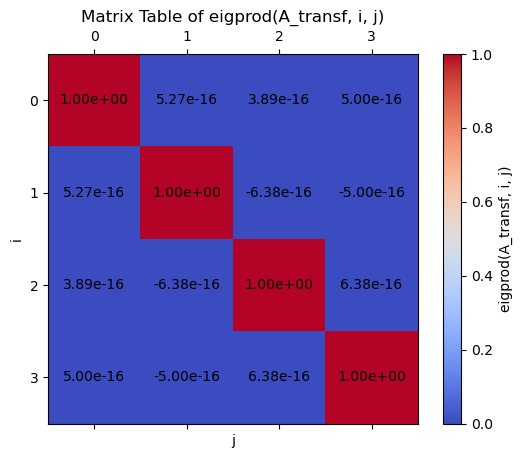

In [7]:
# Reshape eigprod_values into a 4x4 matrix
eigprod_matrix = np.array(eigprod_values).reshape(4, 4)

# Create a heatmap-like matrix table
fig, ax = plt.subplots()
cax = ax.matshow(eigprod_matrix, cmap='coolwarm')

# Add value annotations to the cells
for i in range(4):
    for j in range(4):
        ax.text(j, i, f'{eigprod_matrix[i][j]:.2e}', va='center', ha='center', color='black')

# Customize the plot
plt.xticks(range(4), range(4))
plt.yticks(range(4), range(4))
plt.xlabel("j")
plt.ylabel("i")
plt.title("Matrix Table of eigprod(A_transf, i, j)")

# Add a colorbar
cbar = fig.colorbar(cax)
cbar.set_label("eigprod(A_transf, i, j)")

# Show the plot
plt.show()

Upon examining the outcomes, it is evident that the dot product of eigenvectors such as eigprod(A_transf, 0, 0), eigprod(A_transf, 1, 1), etc., is nearly equal to 1. This outcome is anticipated, since the dot product of a vector with itself is equivalent to the square of its norm, and in this particular scenario, the eigenvectors are normalised to have a norm of 1.

Moreover, the dot product of two different eigenvectors (e.g., <b>eigprod(A_transf, 0, 1), eigprod(A_transf, 0, 2)</b>, etc.) is approximately <b>zero</b>. This is also expected, as the eigenvectors of a matrix are <i>orthogonal to one another</i>, meaning that their dot product should be zero.

However, due to numerical precision issues, "<b>zero</b>" in this context means "a very small number close to zero". This is why we are seeing tiny non-zero values such as $5.274^{-16}$ instead of precise zeros.

So, the observed findings align with the characteristics of eigenvectors of a <b>symmetric matrix</b>, indicating that the my_transf function is likely maintaining the symmetry of the original matrix $A$.

## Task D
Explain the reason for what you noticed. Manipulating the following equation: <br />
$v_{2}(R)^{T} x (R^{T} - R) x v_{3}(R)$<br />
(where $x$ denotes matrix multiplication) might help.
<hr>

The equation <font size="3">$v_{2}(R)^{T} \cdot (R^{T} - R) \cdot v_{3}(R)$</font> can be rewritten as follows:

<font size="3">$v_{2}(R)^{T} \cdot (R^{T} - R) \cdot v_{3}(R) = v_{2}(R)^{T} \cdot R^{T} \cdot v_{3}(R) - v_{2}(R)^{T} \cdot R \cdot v_{3}(R)$</font>

Expanding this equation further, we get:

<font size="3">$v_{2}(R)^{T} \cdot R^{T} \cdot v_{3}(R) - v_{2}(R)^{T} \cdot R \cdot v_{3}(R) = (v_{2}(R)^{T} \cdot R^{T}) \cdot v_{3}(R) - (v_{2}(R)^{T} \cdot R) \cdot v_{3}(R)$</font>

Now, let us examine the phrases included in brackets individually:

<ol>
    <li><font size="3">$(v_{2}(R)^{T} \cdot R^{T})$</font> represents the matrix-vector product of the transpose of vector <font size="3">$v_{2}(R)$</font> and the transpose of matrix <font size="3">$R$</font>. This matrix-vector product results in a vector.</li>
    <li><font size="3">$(v_{2}(R)^{T} \cdot R)$</font> represents the matrix-vector product of the transpose of vector <font size="3">$v_{2}(R)$</font> and matrix <font size="3">$R$</font>. This matrix-vector product also results in a vector.</li>
    <li><font size="3">$v_{3}(R)$</font> represents vector <font size="3">$v3$</font> multiplied by matrix <font size="3">$R$</font>, resulting in a vector.</li>
</ol>

So, the equation can be simplified to:

<font size="3">$(v_{2}(R)^{T} \cdot R^{T}) \cdot v_{3}(R) - (v_{2}(R)^{T} \cdot R) \cdot v_{3}(R)$</font>

Now, based on the properties of matrix multiplication, it can be observed that the first term <font size="3">$[(v_{2}(R)^{T} \cdot R^{T}) \cdot v_{3}(R)]$</font> is equivalent to the transpose of the second term <font size="3">$[(v_{2}(R)^{T} \cdot R) \cdot v_{3}(R)]$.</font> Hence, the symmetric pattern in the off-diagonal members of matrix <b>A_transf</b> is seen, but the presence of minor non-zero values may be attributed to numerical approximations and rounding mistakes during the calculations.

## Task E
<ul>
    <li>Let $v_i$ be the $i^{th}$ eigenvector of $my_transf(A)$, where $A$ is an arbitrary matrix.</li>
    <li>Suppose what you noticed in part c. was true. Are any of the eigenvectors linearly dependenton each other?</li>
</ul>

<i>Recall that if $v_1$ is linearly dependent on ${v_i, ... v_n}$ then $v_1$ is a weighted sum of ${v_i, ... v_n}$. Mathematically $v_{1} = \sum\limits _{i=2} ^{n} g_{i} \cdot v_{i}$ where $g_i$ are arbitrary real numbers representing weights. Taking the dot product of $v_1$ (or $v_i$) with a weighted sum of the other eigenvectors and seeing whathappens might help you here!</i>
<hr>

We know that the eigenvectors are orthogonal to each other, as the dot product of different eigenvectors is zero. This is an important property of the eigenvectors of a symmetric matrix.

Let us assume that one of the eigenvectors, say <font size="3">$v_{1}$</font>, is a linear combination of the other eigenvectors. That is, we can express <font size="3">$v_{1}$</font> as:

<font size="3">$v_{1} = \sum\limits _{i=2} ^{n} g_{i} \cdot v_{i}$</font>

where <font size="3">$g_{i}$</font> are weights. Now, let us take the dot product of <font size="3">$v_{1}$</font> with itself:

<font size="3">$v_{1} \cdot v_{1} = (\sum\limits _{i=2} ^{n} g_{i} \cdot v_{i}) \cdot v_{1}$</font>

Expanding the right side gives:

<font size="3">$v_{1} \cdot v_{1} = \sum\limits _{i=2} ^{n} g_{i} \cdot (v_{i} \cdot v_{1})$</font>

The left side, <font size="3">$v_{1} \cdot v_{1}$</font>, is the square of the norm of <font size="3">$v_{1}$</font>, which is 1 (since eigenvectors are normalised).

On the right side, the dot product <font size="3">$v_{i} \cdot v_{1}$</font> is zero for all <font size="3">$i \neq 1$</font> because the eigenvectors are orthogonal. This means that the entire sum on the right side is zero, which contradicts the left side of the equation (which is 1).

This contradiction indicates that our initial assumption was incorrect. Therefore, <font size="3">$v_{1}$</font> cannot be a linear combination of the other eigenvectors.

In conclusion, the eigenvectors of <b>my_transf(A)</b> are linearly independent, assuming the transformation preserves the symmetry of the matrix <font size="3">$A$</font>.

## Task F
What does your answer to e. (whatever it was) say about the dimension of the vector spacespanned by these eigenvectors?
<hr>

The fact that the eigenvectors are linearly independent implies that each eigenvector adds a new dimension to the vector space it spans.

In other words, if we have $n$ linearly independent eigenvectors, they will span an <b>n-dimensional vector space</b>. Since each linearly independent vector points in a direction that is not covered by the previous vectors, it adds a new dimension to the space.

So, in the case of the transformed matrix <b>my_transf(A)</b>, if it is a <font size="3">$4 \cdot 4$</font> matrix, and all its eigenvectors are linearly independent, they will span a <b>4-dimensional vector space</b>. This aligns with the fact that a <font size="3">$4 \cdot 4$</font> matrix has 4 eigenvectors.

This is a key property of eigenvectors of a matrix: the set of all eigenvectors of a matrix, together with the zero vector, can form a vector space. This is known as <b>the eigenspace of the matrix</b>.

## Task G
For which values of $\theta$ do the following three vectors form a basis of $\mathbb{R}^{3}$?:<br />
{$ \begin{bmatrix} \cos^{2}(\theta), 2, -1\end{bmatrix},  \begin{bmatrix} \sin^{2}(\theta), -2, 1 \end{bmatrix}, \begin{bmatrix} 1, 6, -3 \end{bmatrix}$} <br />
<i>Hint: can we (/not) make <b>any vector</b> out of a weighted sum of these three?</i>
<hr>

In order for a collection of vectors to establish a basis for the <font size="3">$\mathbb{R}^{3}$</font> space, it is imperative that these vectors not only exhibit linear independence but also comprehensively span the <font size="3">$\mathbb{R}^{3}$</font> space.

The criterion for linear independence of vectors hinges on the determinant of the matrix, constituted by these vectors, being non-zero. This implies that none of the vectors can be expressed as a linear amalgamation of the remaining vectors.

To evaluate this, we form a matrix with the given vectors as its rows and proceed to compute the determinant of this matrix.

<font size="3">$\begin{bmatrix} \cos^{2}(\theta)\hspace{1cm}  2\hspace{1cm} -1 \\ \sin^{2}(\theta)\hspace{1cm} -2\hspace{1cm} 1 \\ 1\hspace{2cm} 6\hspace{1.5cm} 3 \end{bmatrix}$</font>


The matrix's determinant is as follows:

<font size="3">$\det = \cos^2(\theta)(-2 -3 - 1\cdot6) - 2(\sin^2(\theta)(-3) - 11) - 1(1\cdot6 - \sin^2(\theta)-2)$</font>

Upon simplification, this yields:

<font size="3">$\det = -12\cos^2(\theta) + 6\sin^2(\theta) + 6$</font>

For the vectors to qualify as linearly independent, their associated determinant must not equal to zero.

Leveraging the trigonometric identity <font size="3">$\sin^2(\theta) + \cos^2(\theta) = 1$</font>, the determinant can be further simplified:

<font size="3">$
\det = -12\cos^2(\theta) + 6(1 - \cos^2(\theta)) + 6\\
\hspace{0.5cm}= -12\cos^2(\theta) + 6 - 6\cos^2(\theta) + 6\\
\hspace{0.5cm}= 12 - 18\cos^2(θ)
$</font>

Setting the determinant to zero:

<font size="3">$
12 - 18\cos^2(\theta) = 0\\
18\cos^2(\theta) = 12\\
\cos^2(\theta) = \frac{12}{18} = \frac{2}{3}
$</font>

Hence, the vectors form a basis for <font size="3">$\mathbb{R}^{3}$</font> for all θ values except those satisfying <font size="3">$\cos^2(\theta) = 2/3$</font>, as for these values, the vectors become linearly dependent and thus do not constitute a basis.

# Question 2
<ul>
    <li>A factory produces CPTs (cheap plastic tat).</li>
    <li>The profi t from each CPT is £5.00.</li>
    <li>Conversely if a CPT fails during the 100 month warranty period, the net profi t from the CPT is£0.00 (i.e. all profi t is refunded)</li>
</ul>
CPTs suffer from two types of faults:
<ul>
    <li><b>Overuse faults</b>: the probability of a given CPT having an overuse fault during month $t$ is <br />$0.001\frac{t^2}{(1+t)}$</li>
    <li><b>Factory faults</b>: the probability of a given CPT having a factory fault during month $t$ is <br />$0.01(1+\frac{1-t}{(1+t)})$</li>
</ul>
Contextual knowledge unnecessary for answering this question <a href="https://en.wikipedia.org/wiki/Bathtub_curve" target="_blank" rel="noopener noreferrer">here</a>

## Task A
Build a function <i>remain_prob()</i> which has no input, and which outputs the probability of a CPTsurviving the fi rst 100 months without a fault. Run it so we can see the output.

In [8]:
def remain_prob():
    prob_survive = 1.0
    for t in range(1, 101):  # loop through each month
        overuse_fault_prob = 0.0001 * (t**2) / (1 + t)
        factory_fault_prob = 0.01 * (1 + ((1 - t) / (1 + t)))
        prob_fault = overuse_fault_prob + factory_fault_prob
        prob_no_fault = 1 - prob_fault
        prob_survive *= prob_no_fault
    return prob_survive

prob_survive = remain_prob()
print(f"Probability of a CPT surviving 100 months: {prob_survive:.4f}")

Probability of a CPT surviving 100 months: 0.5592


## Task B
Build a function <i>factory_simulation(n0::Number)</i> that simulates faults in $n0$ CPTs over $100$ months. EG $n0 = 100$. The function should output a vector $v$ where $v[i]$ is the number ofremaining (i.e. unbroken) CPTs on month $i$. Plot the output of this simulation as a scatter plot. EG with<br />
<i>scatter(1:100, v, xlabel="days", ylabel = "functioning CPTs", ylims = (0,100), label= false)</i>
<br /><br />
The factory can invest in making better products.
<ul>
    <li>If it invests $£x$ per CPT in reducing factory faults, the factory fault probability scales by a factor $k(x) = 1 - 20x$.</li>
</ul>
In other words, the overuse fault probability becomes $k(x) \cdot 0.0001 \frac{t^2}{1+t}$
<ul>
    <li>If it invests $£y$ per CPT in reducing overuse faults, the overuse fault probability also scales bythe same factor $k(y) = 1 -20y$.</li>
    <li>Of course, no amount of investment can reduce the factors $k(x)$ and $k(y)$ below zero.</li>
</ul>

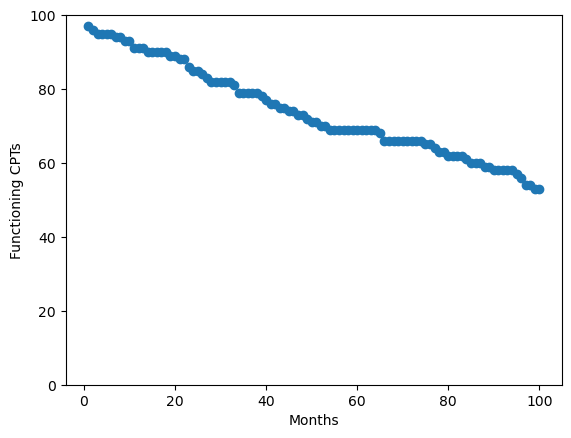

In [9]:
def factory_simulation(n0):
    # Initialize a list of CPTs, where each CPT is represented by a boolean value
    # True means the CPT is functioning, False means it's broken
    CPTs = [True] * n0
    # Initialize a list to store the number of functioning CPTs at each month
    remaining_CPTs = []

    for t in range(1, 101):  # loop through each month
        overuse_fault_prob = 0.0001 * (t**2) / (1 + t)
        factory_fault_prob = 0.01 * (1 + ((1 - t) / (1 + t)))
        total_fault_prob = overuse_fault_prob + factory_fault_prob

        # For each CPT, generate a random number. If the number is less than the total fault probability,
        # the CPT breaks (set to False). Otherwise, the CPT continues to function (remains True).
        for i in range(n0):
            if CPTs[i] and random.random() < total_fault_prob:
                CPTs[i] = False

        # Count the number of functioning CPTs and add to the list
        remaining_CPTs.append(CPTs.count(True))

    return remaining_CPTs

# Run the simulation with n0 = 100 and plot the results
n0 = 100
remaining_CPTs = factory_simulation(n0)
plt.scatter(range(1, 101), remaining_CPTs)
plt.xlabel('Months')
plt.ylabel('Functioning CPTs')
plt.ylim(0, n0)
plt.show()

## Task C
Build a function $profit(x,y)$ that calculates the expected profi t for 100 items if $£x$ are investedin reducing factory faults, and $£y$ are invested in reducing overuse faults.

In [7]:
def profit(x, y):
    # Number of CPTs
    n0 = 100
    # Profit per CPT
    profit_per_CPT = 5.00

    # Ensure that the investments do not reduce the fault probabilities below zero
    x = min(x, 0.05)
    y = min(y, 0.05)

    # Calculate the number of surviving CPTs
    surviving_CPTs = factory_simulation(n0, x, y)

    # Calculate the total profit
    total_profit = len(surviving_CPTs) * profit_per_CPT - (x + y) * n0

    return total_profit

def factory_simulation(n0, x, y):
    CPTs = [True] * n0
    remaining_CPTs = []

    for t in range(1, 101):  # loop through each month
        overuse_fault_prob = (1 - 20 * x) * 0.0001 * (t**2) / (1 + t)
        factory_fault_prob = (1 - 20 * y) * 0.01 * (1 + ((1 - t) / (1 + t)))
        total_fault_prob = overuse_fault_prob + factory_fault_prob

        for i in range(n0):
            if CPTs[i] and random.random() < total_fault_prob:
                CPTs[i] = False

        if CPTs.count(True) > 0:
            remaining_CPTs.append(CPTs.count(True))

    return remaining_CPTs

print(profit(0.03, 0.05))

492.0


## Task D
Let $p(x, y)$ be the mathematical representation of the $profit(x,y)$ you did/not make in the lastquestion. Suppose the factory is commited to investing exactly $10$ pence per CPT in fault reduction.<br /><br />
Write the optimisation problem the company has to solve to maximise profi t. (You don't need towrite a mathematical expression for $p(x, y)$. What condition on the gradient/jacobian of $p$ shouldhold for a locally optimal allocation of investment?
<hr>

### Optimisation Problem:

#### Objective
Maximise <font size="3">$profit(x, y)$</font>, the expected profit function for 100 CPTs, where <font size="3">$x$</font> and <font size="3">$y$</font> represent the investments in reducing factory and overuse faults, respectively.

#### Constraints
<ul>
    <li><font size="3">$x + y = 0.1$</font> (Total investment per CPT is fixed at 10 pence.)</li>
    <li><font size="3">$x \ge 0$</font> (non-negativity constraint for factory fault investment)</li>
    <li><font size="3">$y \ge 0$</font> (non-negativity constraint for overuse fault investment)</li>
</ul>

#### Condition for Locally Optimal Allocation
The gradient (Jacobian) of $profit(x, y)$ should be orthogonal to the constraint boundary <font size="3">$x + y = 0.1$,</font> means that the directional derivative of <font size="3">$profit(x, y)$</font> along the constraint boundary should be zero. Mathematically, this can be expressed as:

<font size="3">$$\nabla profit(x, y) \cdot (1, 1) = 0$$</font>

where <font size="3">$\nabla profit(x, y)$</font> is the gradient of <font size="3">$\nabla profit(x, y)$</font> and (1, 1) is the direction vector along the constraint boundary.

#### Intuitive Explanation
<ul>
    <li>The gradient of <font size="3">$profit(x, y)$</font> points in the direction of the steepest increase in profit.</li>
    <li>The constraint boundary represents all possible combinations of <font size="3">$x$</font> and <font size="3">$y$</font> that satisfy the investment constraint.</li>
    <li>For a locally optimal allocation, the gradient should point in a direction that is tangent to the constraint boundary, meaning that any further movement along the boundary would not increase profit.</li>
    <li>This condition ensures that the optimal allocation is found within the feasible region defined by the constraints.</li>
</ul>

# Question 3

## Game 1
You are presented with three locked boxes: $B_1, B_2$ and $B_3$. One of the boxes contains $£X$, but youdon't know which. The others are empty. You will choose one of the boxes, with uniform probability.
<ul>
    <li>Let's call the box with the money $B_R$. So for instance, if the fi rst box has the money, we write $B_R = B_1$.</li>
    <li>Let's call the chosen box $B_C$. So if we choose the third box, we write $B_C = B_3$.</li>
</ul>

### Task A
Describe the outcome space (i.e. sample space). It might help to note that there are $two$ uncertain events here.
<hr>

In the given situation, there are indeed two uncertain events:
<ol>
    <li>The event of which box contains the money <font size="3">($B_R$)</font></li>
    <li>The event of which box we choose <font size="3">($B_C$)</font></li>
</ol>
Each of these events has three possible outcomes, corresponding to the three boxes, <font size="3">$B_1$, $B_2$</font>, and <font size="3">$B_3$</font>.

The outcome space, also known as the sample space, represents all possible outcomes of these two events. Since each event has three outcomes, and the outcomes of the two events are independent (the box we choose doesn't affect which box contains the money, and vice versa), there are a total of <font size="3">$3 \cdot 3 = 9$</font> possible outcomes in the sample space.

We can represent these outcomes as ordered pairs <font size="3">($B_R, B_C$)</font>, where the first element in the pair represents the outcome of the first event (which box contains the money), and the second element represents the outcome of the second event (which box we choose).

So, the outcome space is:<br>
<font size="3">
{<br>
($B_1, B_1$), ($B_1, B_2$), ($B_1, B_3$),<br>
($B_2, B_1$), ($B_2, B_2$), ($B_2, B_3$), <br>
($B_3, B_1$), ($B_3, B_2$), ($B_3, B_3$)
<br>
}</font>
<br>
Each pair represents a different scenario. For example, the pair <font size="3">($B_1, B_3$)</font> represents the scenario where the money is in box 1 <font size="3">($B_R = B_1$)</font> and we choose box 3 <font size="3">($B_C = B_3$)</font>.

### Task B
Once you choose a box, it is unlocked and you are allowed to keep the money, if there is any. Let $R$ be arandom variable whose value is the amount of money you earn. Calculate $\mathbb{E}[R]$(your expected reward), and $var(R)$(variance of the reward).
<hr>

Let's assume that the amount of money in the box that contains money is <font size="3">£X</font>.

#### Expected Reward ($\in [R]$)
The expected reward is calculated as the sum of all possible outcomes multiplied by their respective probabilities. In this case, it's the average amount of money you expect to earn when you choose a box.

Since you choose a box with uniform probability, the probability of choosing any one of the boxes is <font size="3">$\frac{1}{3}$</font>.

Furthermore, considering that only one of the three boxes contains money (denoted as <font size="3">($£X$)</font>), with the remaining two being empty, it can be deduced that the potential outcomes for the random variable <font size="3">$R$</font> (representing the monetary gain) are limited to two scenarios: <font size="3">($£X$)</font>, in the event of selecting the box containing the money, and <font size="3">($£0$)</font>, should an empty box be chosen.

The probability of choosing the box with the money is <font size="3">$\frac{1}{3}$</font>, and the probability of choosing an empty box is <font size="3">$\frac{2}{3}$</font>.

So, the expected reward is:

<font size="3">$\in [R] = £X  (\frac{1}{3}) + £0  (\frac{2}{3}) = \frac{£X}{3}$</font>

#### Variance of the Reward ($V[R]$)
The variance serves as an indicator of the dispersion of a random variable's values, quantifying the extent to which these values deviate from the mean or expected value. It's calculated as the sum of the squared differences from the expected value <font size="3">($\in [R]$)</font>, each multiplied by its respective probability.

For <font size="3">$R = £X$</font>, the difference from <font size="3">$\in [R]$</font> is <font size="3">$£X - \frac{£X}{3} = (\frac{2}{3})£X$</font>. Squaring this gives <font size="3">$(\frac{4}{9})X^2$</font>.

For <font size="3">$R = £0$</font>, the difference from <font size="3">$\in [R]$</font> is <font size="3">$£0 - \frac{£X}{3} = -(\frac{1}{3})£X$</font>. Squaring this gives <font size="3">$(\frac{1}{9})X^2$</font>.

So, the variance is:

<font size="3">$V[R] = (\frac{4}{9})X^2 (\frac{1}{3}) + (\frac{1}{9})X^2  (\frac{2}{3}) = (\frac{4}{27})X^2 + (\frac{2}{27})X^2 = (\frac{6}{27})X^2 = (\frac{2}{9})X^2$</font>

So, your expected reward is <font size="3">$\frac{£X}{3}$</font>, and the variance of the reward is <font size="3">$(\frac{2}{9})X^2$</font>.

#### Calculation for X = 1
Let us substitute X for 1 in the equations we derived above.

Expected Reward <font size="3">($\in[R]$)</font>:
<font size="3">$\in[R] = \frac{£1}{3} = £0.33$</font> (approximately)

Variance of the Reward <font size="3">($V[R]$)</font>:
<font size="3">$V[R] = (\frac{2}{9}) \cdot 1^2 = \frac{2}{9} = 0.22$</font> (approximately)

So, when <font size="3">$X = 1$</font>, your expected reward is approximately <font size="3">$£0.33$</font>, and the variance of the reward is approximately <font size="3">$0.22$</font>.

## Game 2
<ol>
    <li>After you have chosen a box, you are <b>no longer allowed to immediately open it</b>. Instead, Iopen one of the empty boxes that <b>don't have</b> any money, and show you that they are empty.</li>
    <li>Then you have the option to <b>stick</b> with your initial choice, or <b>swap</b> to the fi nal (unopened,unchosen) box.</li>
    <li>Finally your chosen box (whether your original choice or the swapped one) is opened and youcan take the reward inside, if there is any.</li>
</ol>

### Task C
What are the expected value and variance of your reward if you use the 'stick' strategy? What about if youuse the 'swap' strategy?<br /><br />
<i>Hint: Separate outcomes into two events: 1. that you initially, unknowingly choose the correct box, and 2. thatyou choose one of the incorrect boxes</i>
<hr>

The expected value of a random variable represents a measure of the central tendency within its probability distribution, encapsulating the average outcome one might anticipate. In contrast, the variance quantifies the degree of dispersion or spread of the numbers in the set, indicating how much these values deviate from their mean.

We denote the value of the reward as <font size="3">$£X$</font>.

#### Let's first calculate these values for the 'stick' strategy

Expected Value (Stick Strategy): The expected value is the sum of all possible outcomes multiplied by their respective probabilities. In this case, there are only two possible outcomes: you either win <font size="3">$£X$</font> (with a probability of <font size="3">$\frac{1}{3}$</font>) or you win nothing (with a probability of <font size="3">$\frac{2}{3}$</font>). Therefore, the expected value (E) is:

 <font size="3">$E(Stick) = £X  (\frac{1}{3}) + £0  (\frac{2}{3}) = \frac{£X}{3}$</font>

#### Variance (Stick Strategy)
The variance of a random variable is indeed the expected value of the squared deviation of the variable from its mean. Mathematically, the variance (Var) is defined as the average of the squared differences from the mean. In here, the variance (Var) is:

<font size="3">$
Var(Stick) = ((£X - \frac{£X}{3})^2  (\frac{1}{3})) + ((£0 - \frac{£X}{3})^2  (\frac{2}{3}))\\
\hspace{2.4cm}= (\frac{2}{9}  £X^2) + (\frac{1}{9}  £X^2) = \frac{£X^2}{3}
$</font>

Now, let's calculate these values for the 'swap' strategy:

#### Expected Value (Swap Strategy)
Again, there are two possible outcomes: you either win $£X$ (with a now increased probability of <font size="3">$\frac{2}{3}$</font> due to the swap strategy) or you win nothing (with a probability of <font size="3">$\frac{1}{3}$)</font>. Therefore, the expected value (E) is:

<font size="3">$E(Swap) = £X  (\frac{2}{3}) + £0  (\frac{1}{3})\\
\hspace{2cm}= 2 \cdot \frac{£X}{3}$</font>

#### Variance (Swap Strategy)
Here, the variance (Var) is:

<font size="3">$
Var(Swap) = ((£X - \frac{2£X}{3})^2  (\frac{2}{3})) + ((£0 - \frac{2£X}{3})^2 (\frac{1}{3}))\\
\hspace{2cm}= (\frac{1}{9}  £X^2) + (\frac{4}{9}  £X^2) = \frac{£X^2}{2}
$</font>

These calculations show that the 'swap' strategy yields a higher expected reward <font size="3">($£X \cdot \frac{2}{3}$)</font> than the 'stick' strategy <font size="3">($\frac{£X}{3}$)</font>, and it also has a higher variance <font size="3">($\frac{£X^2}{2}$ vs $\frac{£X^2}{3}$)</font>, indicating a wider spread of possible outcomes.

### Task D
Instead of having one box with a reward amongst three total boxes, suppose we have $K$ boxeswith a reward out of $N$ total boxes. What are the expected value and the variance of the reward nowfor the swap strategy?
<hr>

Given these assumptions, where <font size="3">$N$</font> represents the total number of boxes, <font size="3">$K$</font> denotes the number of boxes containing a reward (with the value of each reward being <font size="3">$£X$</font>), and the condition that the host will always open an empty box if a box with a reward is initially chosen.

#### Expected Value (Swap Strategy)
With the swap strategy, if you initially choose a box with a reward (probability <font size="3">$\frac{K}{N}$</font>), the host will reveal an empty box and if you swap, you will end up with an empty box. However, if you initially choose an empty box (probability <font size="3">$\frac{(N-K)}{N}$</font>), the host will still reveal an empty box and if you swap, you will end up with a box with a reward. Therefore, the expected value <font size="3">($E$)</font> is:

<font size="3">$E(Swap) = £X  (\frac{(N-K)}{N}) + £0 (\frac{K}{N}) = £X \cdot \frac{(N-K)}{N}$</font>

#### Variance (Swap Strategy)
For variance (Var), we calculate it as:

<font size="3">$
Var(Swap) = ((£X - E(Swap))^2  (\frac{(N-K)}{N})) + ((£0 - E(Swap))^2  (\frac{K}{N}))\\
\hspace{2cm}= ((£X - £X  \frac{(N-K)}{N})^2  (\frac{(N-K)}{N})) + ((£0 - £X  \frac{(N-K)}{N})^2  (\frac{K}{N}))\\
\hspace{2cm}= ((\frac{K}{N}  £X)^2  \frac{(N-K)}{N})) + ((£X  \frac{(N-K)}{N})^2  (\frac{K}{N}))\\
\hspace{2cm}= £X²  \frac{(K  (N-K)^2 + K \cdot (N-K)^2) }{ N^3}\\
\hspace{2cm}= £X²  \frac{(2K  (N-K)^2)}{ N^3}
$</font>

This formula shows the expected value and variance of the reward for the swap strategy when there are <font size="3">$K$</font> boxes with a reward out of <font size="3">$N$</font> total boxes. The expected value increases as the number of boxes without a reward increases, and the variance is determined by the number of reward and non-reward boxes.

# Question 4
<hr>
<ul>
    <li>In this question, $t$ denotes time.</li>
    <li>Recall that $\dot{x}(t)$ denotes the time derivative of a time-varying quantity $x(t)$. In other words, $\dot{x}(𝑡)$ is shorthand for $\frac{dx}{dt}(t)$.</li>
</ul>
<hr>
We're going to build a model of interacting predator and prey populations. We model births anddeaths of predators and prey. We will refer to this as the <i>basic model</i>.<br /><br />
<center>
$
\dot{N}(t) = aN(t) - bN(t)P(t) \\
\dot{P}(t) = cN(t)P(t) - dN(t)
$
</center>
<ul>
    <li>$N(t)$ is proportional to the number of prey</li>
    <li>$P(t)$ is proportional to the number of predators</li>
    <li>Note that $N(t)$ and $P(t)$ can be fractional in this model.</li>
    <li>$a$ and $b$ are parameters that set the birth and death rates of prey</li>
    <li>$c$ and $d$ are parameters that set the birth and death rates of predators.</li>
</ul>

## Task A
What's the maximum predator population for which prey births still outstrip deaths?
<hr>

In order for prey births to outstrip deaths, the rate at which prey are born must be greater than the rate at which they die. This is represented by the inequality:

<font size="3">$𝑎𝑁(𝑡) > 𝑏𝑁(𝑡)𝑃(𝑡)$</font>

We can simplify this inequality by dividing through by <font size="3">$𝑁(𝑡)$</font> (which is possible as long as <font size="3">$𝑁(𝑡)$</font> is not zero):

<font size="3">$𝑎 > 𝑏𝑃(𝑡)$</font>

Rearranging this inequality to solve for the predator population <font size="3">$𝑃(𝑡)$</font> gives us:

<font size="3">$𝑃(𝑡) < \frac{𝑎}{𝑏}$</font>

So, the maximum predator population for which prey births still outstrip deaths is <font size="3">$\frac{a}{b}$</font>. If the predator population <font size="3">$𝑃(𝑡)$</font> exceeds this value, then prey deaths due to predation will exceed births.

## Task B
Under what conditions is the predator population shrinking?
<hr>

The predator population is shrinking when the rate of predator deaths exceeds the rate of predator births. In terms of the given model, this corresponds to when:

<font size="3">$𝑑𝑃(𝑡) > 𝑐𝑁(𝑡)𝑃(𝑡)$</font>

We can simplify this inequality by dividing through by <font size="3">$𝑃(𝑡)$</font> (which is possible as long as <font size="3">$𝑃(𝑡)$</font> is not zero):

<font size="3">$𝑑 > 𝑐𝑁(𝑡)$</font>

Rearranging this inequality to solve for the prey population <font size="3">$𝑁(𝑡)$</font> gives us:

<font size="3">$𝑁(𝑡) < \frac{d}{c}$</font>

So, the predator population is shrinking when the prey population <font size="3">$𝑁(𝑡)$</font> is less than <font size="3">$\frac{d}{c}$</font>. If the prey population <font size="3">$𝑁(𝑡)$</font> exceeds this value, then predator births due to successful predation will exceed deaths.

## Task C
In this model, what do the dynamics of the prey population over time look like in the absence of predators $(P(0) = 0)$)? Do you think this is reasonable? <i>(A verbal description without maths is suffi cient,although you are welcome to use equations if you like)</i><br /><br />
Let's now modify the predator-free (i.e. $P(0) = 0$) prey dyamicsc to be:<br />
$\dot{N}(t) = aN(t)(1 - \frac{N(t)}{K})$<br />
where $K > 1$ is a parameter we will ask you to describe.
<hr>

In the original model, if we consider the absence of predators <font size="3">$(P(0) = 0)$</font>, the equation for the prey population becomes:

<font size="3">$\dot{N}(𝑡) = 𝑎𝑁(𝑡)$</font>

This equation models an exponential growth in the prey population over time, where <font size="3"><b>$a$</b></font> is the growth rate. The population of prey would grow indefinitely, given no predators are present to limit their numbers. This can be seen as unrealistic in a natural ecosystem because resources (like food and habitat) are generally not unlimited.

However, the modified predator-free prey dynamics are:

<font size="3">$\dot{N}(𝑡) = 𝑎𝑁(𝑡) (1 - \frac{𝑁(𝑡)}{𝐾})$</font>

introduces the factor <font size="3">$(1 - \frac{𝑁(𝑡)}{𝐾})$</font>, which acts as a form of environmental resistance to unlimited population growth. Here, <font size="3"><b>$K$</b></font> represents the carrying capacity, defined as the maximal population size that can be sustained indefinitely by the environment, given the resources available. 

As the prey population <font size="3">$𝑁(𝑡)$</font> gets closer to the carrying capacity <font size="3">$K$</font>, the term <font size="3">$(1 - \frac{𝑁(𝑡)}{𝐾})$</font> approaches zero, which slows down the growth rate. When <font size="3">$𝑁(𝑡)$</font> equals <font size="3">$K$</font>, the growth rate becomes zero, indicating that the population has reached its maximum sustainable size.

This modification makes the model more realistic, as it now takes into account the limitations of the environment and prevents the prey population from growing indefinitely.

## Task D
What are the fi xed points of the prey dynamics? How would you interpret the parameter $K$?
<hr>

The fixed points, or equilibrium points, of a differential equation are the points at which the derivative is zero, meaning the system is not changing over time.

For the modified prey dynamics:

<font size="3">$\dot{𝑁}(𝑡) = 𝑎𝑁(𝑡) (1 - \frac{𝑁(𝑡)}{𝐾})$</font>

We set the derivative equal to zero and solve for <font size="3">$𝑁(𝑡)$</font>:

<font size="3">$𝑎𝑁(𝑡) (1 - \frac{𝑁(𝑡)}{𝐾}) = 0$</font>

This equation will be zero if either <font size="3">$𝑁(𝑡) = 0$</font> or <font size="3">$(1 - \frac{𝑁(𝑡)}{𝐾}) = 0$</font>.

Solving the second equation for <font size="3">$𝑁(𝑡)$ gives us $𝑁(𝑡) = 𝐾$</font>.

So, the fixed points of the prey dynamics are <font size="3">$𝑁(𝑡) = 0$ and $𝑁(𝑡) = 𝐾$</font>.

The parameter <font size="3">$𝐾$</font> is known as the carrying capacity. It represents the maximum number of individuals in the prey population that the environment can support indefinitely. This takes into account factors such as the availability of food and space. Once the prey population reaches this size, it will stop growing as the birth rate equals the death rate. This is a more realistic representation of population dynamics than indefinite exponential growth.

In [11]:
data = np.array([0.0,0.8253705906272355,0.8202189457560609,0.01,1.2512593336967723,0.8804750446630152,0.02,1.0744696556474873,1.1951921572383182,0.03,1.1459487035702027,1.367022776863449,0.04,0.7406895127926447,0.8201930700228012,0.05,0.8032848443220044,0.8020943063852652,0.06,1.0423448720147894,0.9964271033305258,0.07,0.8669728720976302,0.9441559192867863,0.08,1.2485960741022775,1.5041279662393712,0.09,1.076411156475735,1.1868935239104308,0.1,1.0913514213811686,0.9337625654623029,0.11,1.221170545353793,1.1610562276254386,0.12,1.375609475040752,0.655991292042743,0.13,0.8456932534642474,0.8506565612423291,0.14,1.258988003318481,1.1437659353110625,0.15,1.0879326273705237,1.0144919079948402,0.16,1.2153693242032464,0.7890236302137076,0.17,1.3345684906603732,0.845424978575131,0.18,1.3137461562592339,0.8732260333351302,0.19,1.428277636494295,0.7061086355004339,0.2,1.5634075717811937,1.0395408458276172,0.21,1.3657438416115804,0.7780988598914812,0.22,1.4701608691245298,0.5437392240834374,0.23,1.5807693768769069,0.9623069207018562,0.24,1.3611883347347324,0.9821342334236914,0.25,1.4457543056328748,0.8463710162668501,0.26,1.513272170291705,0.45113076913045824,0.27,1.5756694495348156,0.7030469767603075,0.28,1.7020605367742399,0.5729183278716372,0.29,1.5481502977674486,1.0163316238356903,0.3,1.5900510345416954,1.1060720781878284,0.31,1.0176651770385163,0.8433681203723178,0.32,1.4750305241179156,0.8633310778531771,0.33,1.7081457157589555,0.7183105081906727,0.34,1.4545873580628512,0.7161981206236734,0.35,1.6425374522443608,0.8451669712966948,0.36,1.2322095928749066,0.7277924775899506,0.37,1.7442236802696258,0.9444102056298844,0.38,1.6192842786863628,0.521116022711692,0.39,1.6720580362341673,0.9848395057495227,0.4,1.4406205509598402,0.6515616676522077,0.41,1.8104217696306768,0.8706134751492154,0.42,1.7459932031571956,0.3144483218946911,0.43,1.5767615322608257,0.9555716460005269,0.44,1.9883647007071132,0.6516479213791484,0.45,2.0759946358397485,0.3587906462339842,0.46,1.7891540869010643,0.7250806159755979,0.47,2.0063940831177627,0.6774129096864877,0.48,2.351207088675081,1.0236509460596814,0.49,2.0023608091194363,0.667932869715822,0.5,1.7307173612759736,0.501168623020454,0.51,2.039375219294437,0.8649538899170633,0.52,1.7940703111564535,0.7907339894164709,0.53,1.8975440140190953,1.0397029814910477,0.54,2.1292376751093736,0.5619762412364976,0.55,2.166703207978072,1.0916421814821662,0.56,2.355302913074924,0.6074458043963602,0.57,2.5081045622410763,0.8992398806684452,0.58,2.4655037772173114,0.7100132147171605,0.59,2.3719926113777676,0.9543949865179597,0.6,2.415344505684415,0.7608814073283383,0.61,2.4519116927962483,0.1518977986382677,0.62,2.508686203478478,0.8777536036963025,0.63,2.44182495142244,0.3823790716156763,0.64,2.0953200090463766,0.756025640199692,0.65,2.371777573831583,0.94151456106178,0.66,2.7044765777810214,0.26000283454630163,0.67,2.7806801024780663,0.4655487715362591,0.68,2.8505994601079347,0.8731015661504052,0.69,2.118623542208117,0.8223683742763328,0.7,2.621650428862529,0.9131445555351273,0.71,2.582402132244429,0.8946045465353925,0.72,2.483455037038926,1.0804949294453423,0.73,2.7572845455280195,0.8781018922046983,0.74,3.037439215513899,0.7605951160308121,0.75,2.8142606623509803,0.5718944238558733,0.76,2.882627355854355,0.8423085744922739,0.77,2.6919362643369737,0.6537816111465011,0.78,2.9753950748656632,0.719193181569344,0.79,3.0201614018936467,0.9311606867703295,0.8,2.8378595179797887,1.3062887919414568,0.81,3.1485048063642074,0.9583632891106408,0.82,2.8551434774933604,0.5686122074721297,0.83,2.7217156460548937,0.7916533287783812,0.84,3.0066794823419003,0.7229932623718125,0.85,3.2991929070971246,0.7708487675653453,0.86,3.2554299528848207,0.8826191739938739,0.87,3.350693449957946,0.6764175410308613,0.88,3.1485729050577214,1.0557116508974644,0.89,2.940802542097215,1.3186954675236489,0.9,3.4216160463483165,1.0655201490268742,0.91,3.6496661453401464,0.9868288580985981,0.92,3.7735996493671515,0.6236263561003901,0.93,3.6779253144380375,1.0522258249795788,0.94,3.5548241659620192,0.9970048790818771,0.95,3.7205692095695384,0.9363674379234116,0.96,3.7191478156316724,1.180710154914114,0.97,3.8265182016340824,1.0614030299339015,0.98,3.7654174965718243,1.0809638766740044,0.99,3.8876378228393293,0.8805970655863106,1.0,3.2517154072100416,1.061573048050119,1.01,3.802494373562257,1.294143355228126,1.02,3.7380941484585244,1.4174672336551806,1.03,4.10419094949246,1.2897930568291085,1.04,3.8610475178369366,1.3813135272991088,1.05,3.90655891410061,0.9567145819063867,1.06,4.116352164311322,0.925552053189032,1.07,3.785241723237567,1.2679570691628406,1.08,3.7384576832046372,1.123604703705015,1.09,4.0399392139651935,1.4784111890087166,1.1,3.9920674027997056,1.280541928801772,1.11,3.761001739376474,1.2998915551104322,1.12,4.179086933311257,1.3027816505973397,1.13,3.6938897559969477,1.0357324781825141,1.14,3.865997460139013,1.486026073023141,1.15,4.126991087506379,1.3366818924274007,1.16,4.44028835829517,1.302071847268636,1.17,3.8948317213944947,1.2719272880533414,1.18,3.9660739831477807,1.5269101959997764,1.19,3.96417055783056,1.394160532189975,1.2,3.951741379634038,1.3393730340995145,1.21,4.130423700118754,1.9225294077584258,1.22,4.011153295523203,1.3789558003503761,1.23,4.127114937276425,1.8158897289687976,1.24,3.8576560383714424,1.7175629765004268,1.25,4.028234337453515,1.5799859944613261,1.26,4.245641116516499,2.004985800788266,1.27,4.076117409545003,1.9105867315709613,1.28,4.00400301175127,1.6556424770499498,1.29,3.7823342308538295,1.6324364627833166,1.3,3.764996086913561,2.1247393370528167,1.31,3.8659291830929945,1.8784350833246848,1.32,3.5968682859804626,2.188643095611304,1.33,3.903770860376655,2.111913062251637,1.34,3.507049053282115,2.2999758180173573,1.35,3.602888291346972,1.9809206761801883,1.36,3.2503668252016253,2.179376027266853,1.37,3.2415726746318536,1.8744057617442926,1.38,3.298615446389396,2.2443323580979375,1.39,3.3496050279320624,2.746262416501709,1.4,3.5523062176565197,2.375882352440953,1.41,3.356074635593233,2.4731998893925824,1.42,3.124247954671158,2.109360093874913,1.43,2.8411526022537363,2.690627874902785,1.44,3.051096033186018,2.492938663675386,1.45,3.07624609786167,2.108214342756693,1.46,2.9047865239434705,2.417236745149951,1.47,3.0559491404706045,2.46153937847029,1.48,2.75546186847479,2.638613254380666,1.49,2.965551628445072,2.5230261567288754,1.5,2.6184637344935116,2.840825402995792,1.51,2.4865336280057253,2.5942899295575756,1.52,2.863511151956073,2.7074844267779614,1.53,2.471359518548605,2.414562391126137,1.54,2.3413930374187584,2.520526907526854,1.55,2.5956239512418406,2.58576815527428,1.56,1.899129933067544,2.6652152687682444,1.57,2.736308054048812,2.6743762721684883,1.58,2.1619347853076345,2.630687460093294,1.59,2.3017624464496675,2.6023090062623413,1.6,2.1668332403287187,2.6066345070118317,1.61,2.2313821910680023,2.897725782442959,1.62,2.1627966876233238,2.7052575832788057,1.63,2.291740372742384,2.7043721875560878,1.64,2.2921606630342897,2.912388404601338,1.65,1.8887921812254713,2.892475740447905,1.66,1.646931925264305,2.7376866240869235,1.67,1.4503187834012772,2.881901979381492,1.68,1.5897447161567788,2.583759618163891,1.69,1.7731465796823263,3.0635672260641806,1.7,1.6523016738776406,2.8226253701502704,1.71,1.1990886777888394,3.04477240864657,1.72,1.3029898833844376,2.7631376192260317,1.73,1.4537400757641468,2.3985093131095767,1.74,1.889872090711736,2.4667584870661416,1.75,1.1574287858045684,2.583915356682998,1.76,1.6432197897921526,2.4644503111419134,1.77,1.516895712695242,2.7214622407673947,1.78,1.4640042795400443,2.404350028043953,1.79,1.1849935631094908,2.4395917381343404,1.8,1.1751195534749899,2.4442755167909045,1.81,1.2550483535239274,2.3807114738944923,1.82,1.3285483741775175,2.525899488020486,1.83,0.9065771882406435,2.276068167668241,1.84,1.3721556067161755,2.908165170703417,1.85,1.401946604385084,2.212138315037437,1.86,1.332569785408628,2.588678931149495,1.87,0.9665648235610689,2.6303059297285527,1.88,1.45424514734988,2.5831852858705266,1.89,0.8508406820771799,2.419095330210788,1.9,0.9782665372929478,2.421449454871508,1.91,1.2271608150569089,2.1249827276443902,1.92,1.3009739216215368,2.1044471944866685,1.93,1.3878758883141558,2.274632068316371,1.94,1.0192196455894986,2.3631181318447405,1.95,0.7460924551769945,2.212994962159642,1.96,1.0135600493536732,2.099198874030175,1.97,1.357768301252331,1.8143388500069082,1.98,0.8458840313979914,2.2490630949281045,1.99,0.5837888734093417,1.798069126839448,2.0,1.166291175149156,1.752280256424795,2.01,1.2639980921120724,2.223831499754789,2.02,0.7439375366871275,1.9681020078763587,2.03,1.0322946391382744,2.2284417182561764,2.04,1.1135931690994436,2.3167235296122604,2.05,0.7063244789844492,2.15162876070362,2.06,1.028004626103985,1.7400111941800125,2.07,0.7643890567290035,2.247327313264645,2.08,0.6119526070979482,2.0563119892544495,2.09,0.8206242707710532,1.9357572375683454,2.1,0.8191755713776503,1.863006116121921,2.11,0.8155354463512944,2.3869868607471116,2.12,1.0103225502097959,1.9695111087867316,2.13,1.2975728937486468,2.081289749140055,2.14,0.7798735514758816,2.1153312383253966,2.15,0.7189005245823479,1.6465468387977473,2.16,0.6986417935362176,1.6851321022741892,2.17,0.690833148546571,1.8496259015168497,2.18,1.0627677251138892,1.7670672162246546,2.19,0.6512178027905718,1.8668013001146722,2.2,0.6509854672497042,2.001288365242748,2.21,0.5677029315528865,1.5750474195633095,2.22,0.3120192685526839,1.6158642662108906,2.23,1.1389317445455605,1.6540484996323912,2.24,0.7243157673843392,1.8454300487432365,2.25,0.5299175819196007,1.4093341691005568,2.26,0.8859130924104746,1.4946593886760249,2.27,1.0742787196198258,1.7262096340820579,2.28,0.9237842656511487,1.386343279096365,2.29,1.0627867649960023,1.1615689749008193,2.3,0.7194877974007753,1.9406547702604644,2.31,0.6474155677173562,1.3435399470045093,2.32,0.583547630831506,1.1381175796749943,2.33,0.5325677412539862,1.730938166142046,2.34,1.0085575774117688,1.6202944332089906,2.35,0.887860657708986,1.4395796076161362,2.36,1.1731547136075007,1.2704364915263435,2.37,0.46333070178271596,1.333505285789843,2.38,0.9281905641170881,1.473859255307826,2.39,1.0953940529806867,1.777942080387186,2.4,0.7120634357997596,1.3367259818483956,2.41,0.7825308530820887,1.7215577322244107,2.42,0.7409897423784212,1.310485182902497,2.43,0.5858010007075899,1.186145201514079,2.44,1.1244774914677729,1.1848629753421618,2.45,0.6942398731358219,1.2858357708633905,2.46,0.7491599840603169,1.4038381422528943,2.47,0.6289297315813736,1.4116877229509261,2.48,1.0396097922561618,1.050591374030939,2.49,0.7533200282638459,1.4809033431435237,2.5,0.7622777858502037,0.7808348824142383,2.51,1.1001169171522376,1.3218779124026583,2.52,1.3708768106059916,1.1410090291602628,2.53,1.0729989830951117,1.1917579450667932,2.54,0.7635988914072376,1.16425282984012,2.55,1.137816537261179,1.4443939617294597,2.56,0.9065717790346248,1.04844333378782,2.57,0.7097657118429275,1.1762508184704914,2.58,0.7426919242906024,1.0527987825612088,2.59,0.8919704126214323,1.1514113180329035,2.6,0.5203822104718214,1.0231602470759045,2.61,0.7584046867588214,1.1857603134058605,2.62,0.7117511373934757,0.8942012697446813,2.63,0.8139187043410363,0.835381263061259,2.64,0.9305854985785332,1.0410799865569764,2.65,0.7720714250170179,0.7399813061387854,2.66,0.8665655337958041,0.9184115189473784,2.67,0.6226243356836769,0.9667428541531915,2.68,0.8942032431208679,1.2674375245039973,2.69,1.0709558020956051,1.3577172095867671,2.7,0.914859042690237,1.0489949912513266,2.71,1.383860415035373,0.7557940062672551,2.72,1.0792281257663257,1.014644374566306,2.73,0.7927760626973879,0.7314435322425165,2.74,1.063884076395786,0.5418285971326535,2.75,1.0626614775268373,0.48332479623047087,2.76,0.6957754676278398,0.8386053181770811,2.77,0.7336209352788814,0.7231693671889614,2.78,1.020578250695643,0.6432999286751863,2.79,0.9863716780108929,0.8165026965676865,2.8,1.1449456542864722,1.134825190247135,2.81,1.1801440560533858,0.9666140623127432,2.82,1.2566603583572178,0.7387823222754977,2.83,1.2530430246308948,0.9256490220874591,2.84,1.364016710639729,0.9573524700156668,2.85,1.3023833732259464,1.1388448153319857,2.86,1.101350481362554,0.7539036301948927,2.87,0.7307100010641953,0.8553560568141589,2.88,1.2355721675143472,0.8222929387654909,2.89,1.1887587906213644,0.7315498755268175,2.9,1.220400666008882,0.670254252029709,2.91,1.5400681158220777,0.799592336899042,2.92,1.3822247150671003,0.8228597376661854,2.93,1.280601782915936,0.9390809570568438,2.94,1.2662338818566479,0.9517682733305673,2.95,0.9101946917356465,0.842925326536793,2.96,1.2869340840183179,0.6866093918525702,2.97,1.7834865660352501,0.8580123877142334,2.98,1.6054485098373064,0.4561651612546335,2.99,1.4553563777136496,0.8730845983491127,3.0,1.3886186163865049,0.9370772110223358,3.01,1.5692575550285557,0.7639996777821291,3.02,1.137510067505801,0.7720867949226508,3.03,1.3795294210196107,0.49059838423714325,3.04,1.500497546361021,0.3387571812392564,3.05,1.7443111543940788,0.6015884213906206,3.06,1.500498228519984,0.5034183917045102,3.07,1.656395319783736,0.47708158515290017,3.08,1.623932221995836,0.504297000639611,3.09,1.303805875916974,0.5181466590241512,3.1,1.4449304052094298,0.8270741717504877,3.11,1.6928401043591466,0.3901195933890724,3.12,1.6509962530875657,0.7180548677903247,3.13,1.711360621939023,0.8538164316264223,3.14,1.7897762872010488,0.7561677019783622,3.15,1.8626864590697658,0.8644633585047476,3.16,2.2409192010909718,0.49020707536618013,3.17,2.178737498458009,0.5823152290590482,3.18,2.2273677811923163,0.6858622961862559,3.19,1.9219700742112877,0.5858021433830191,3.2,2.0443163794844326,0.5460773348879607,3.21,1.997734129180287,0.84890636842309,3.22,1.629770275039083,1.0496813686582676,3.23,1.9210844279677886,0.7879952247575518,3.24,1.8270647239115714,0.4485162980542294,3.25,2.0028617617485027,0.39309160583724717,3.26,2.0255790374929297,0.8734757506062962,3.27,2.048743315405754,0.6341073542659182,3.28,2.3296649475413904,1.017477004166842,3.29,2.7317447929930134,0.8569936126503923,3.3,2.3545440709081893,0.7941761502836587,3.31,2.2200099626199785,0.9290481472681227,3.32,2.236920329140511,0.631237093447086,3.33,2.3014687000830265,0.7601073638463262,3.34,2.6686529380394832,0.9864570457142519,3.35,2.639314615105396,0.5138140374059968,3.36,2.3909683874272494,0.8843143643999684,3.37,2.795671934445007,1.006561115596391,3.38,2.8075247468439346,0.5584016868092817,3.39,2.5857492264308672,0.8271407317951943,3.4,2.7122844150811813,0.831107983496409,3.41,2.7758981858274288,0.6368289359124656,3.42,2.8336495712909953,0.9760641683501623,3.43,2.8329332511535092,1.033342226447769,3.44,3.2432071696829228,0.8259589450474693,3.45,2.773018178763293,0.7611846982504704,3.46,2.8044881246711184,0.8818234225544309,3.47,2.9565664024502385,0.8260104863251989,3.48,2.99143537206267,0.6791430721277019,3.49,3.0387032610249864,0.6599077046917755,3.5,2.9080108143605834,0.8640889732846994,3.51,3.1716913376795715,0.8166229731247442,3.52,3.5677310613244617,0.7513862244503224,3.53,3.383604932803528,0.6878886161628661,3.54,3.4441828863193718,0.7755396089443504,3.55,3.444555090187697,0.9380211121671975,3.56,3.2401656735791686,1.0839269382599375,3.57,3.439796769572349,1.207469724065135,3.58,3.318849945834521,0.9304072651777695,3.59,3.2995786165072696,0.4942899113165482,3.6,3.430586194791578,0.6498288812686284,3.61,3.406492772358093,0.9154851168347139,3.62,3.7118881941370545,1.1265674376950512,3.63,3.571760423485351,1.058732912571716,3.64,4.155657472725945,0.9535227996806671,3.65,3.8144563747700464,0.8681669914953192,3.66,3.9359492051017284,1.2169910128359345,3.67,3.528590720958142,1.1499030019508165,3.68,4.109905553120379,1.0638960644088797,3.69,4.045796334545698,1.2758236404292198,3.7,3.6724529253102602,0.8883403654819115,3.71,4.046005255086986,1.0541405541350555,3.72,3.7765416726333374,1.2498624853768905,3.73,4.469971652862149,1.0839307566674579,3.74,4.228275437245985,1.4065025907609319,3.75,3.9488106848863045,1.2206619281141573,3.76,4.0482166435395825,1.6760275041191273,3.77,4.296878335291239,1.195774276825841,3.78,4.405113543184753,1.1021281875174112,3.79,3.729844395047192,1.6161445884388854,3.8,4.496489870419789,1.3164685359394497,3.81,4.577045214012909,1.5937349352866683,3.82,4.2154883912117835,0.891815430538095,3.83,4.172475827179526,1.5625910908347291,3.84,4.3234605310432395,1.4759625300380006,3.85,3.7332067626883596,1.5284533326681207,3.86,4.125194631042692,1.472865908342905,3.87,4.880353338049279,1.155676809943731,3.88,4.3683828339914506,1.6968577168851948,3.89,4.2759461530536305,1.6974507758126047,3.9,4.281495835898362,1.80238117940915,3.91,4.69074591641653,1.4857277164157008,3.92,4.407367613585688,1.7525501116517788,3.93,3.9881134307669868,1.9517704498860997,3.94,4.15938001496773,1.6971603655143466,3.95,4.216406285045702,1.7065194432954738,3.96,4.3123938601945415,1.9878665766349222,3.97,3.9713570858192067,1.6396698990704897,3.98,4.324917713617724,2.065545224343898,3.99,4.398278780768667,1.9932667056741626,4.0,3.714355957000438,2.1669482725150457,4.01,3.6541713623597656,1.9513676767896009,4.02,3.974955729964032,2.0427383751060884,4.03,4.265143785731212,2.232554724994495,4.04,3.8528193970591813,1.9568140095455961,4.05,4.050631642678458,2.4195878714468466,4.06,3.5287990997272463,2.126512523590597,4.07,3.46133889348159,2.161993328019015,4.08,3.8518435766214947,2.4761031869179164,4.09,3.162622651179539,2.136632718948933,4.1,3.3966620250329767,2.357034476069543,4.11,3.181178202335717,2.24775130230936,4.12,3.402757519430781,2.7724822933788653,4.13,3.4225240208131766,2.409724368465312,4.14,3.204436957944081,2.6074769679191965,4.15,2.9963209456950035,2.418362927396508,4.16,3.038603292339582,2.6439683720760683,4.17,2.664425080649296,2.7474822052014107,4.18,2.798020977940009,2.8400688014644473,4.19,2.730844931663201,2.893204583071302,4.2,2.55099337228026,2.702419876277637,4.21,2.826480288331819,2.7827411996530698,4.22,2.656237488269432,2.639708139695797,4.23,2.5777608797602243,2.6401538772962923,4.24,2.5616617761051708,2.895649014175869,4.25,2.588346917950694,2.577446297111005,4.26,1.9677067424468513,3.0614314117790657,4.27,2.6267669314228788,2.6038489674076932,4.28,2.194121163549542,3.1905251500123653,4.29,2.424808687914503,2.4974502412061628,4.3,1.8873246678799347,2.9296811541484438,4.31,1.854781178633124,2.887498687652754,4.32,2.202945881267647,2.6510158438151663,4.33,2.3757643355830127,2.549321724059296,4.34,1.9086743845824017,2.841926237113323,4.35,1.6146363896867986,3.0115345499616484,4.36,1.7150333019397208,2.86259565290055,4.37,1.8781091355171013,3.0101690931150897,4.38,1.4694768047813287,3.0567728709614004,4.39,1.6430665479981512,3.022304806794602,4.4,1.539038834312233,2.8847666401241803,4.41,1.6222487679014808,2.943331891464817,4.42,1.6127474802004171,2.8158194570467643,4.43,1.349160225156874,2.6159511350908935,4.44,1.2799143696078998,2.4774825781392593,4.45,1.1558415570213882,2.6371623218681592,4.46,1.213404234783244,2.6282978316408436,4.47,1.3671928120407704,2.5805123265688,4.48,1.1983301906747053,2.9075211631240556,4.49,0.9347152216288632,2.827413318945958,4.5,1.29130376694084,3.0137841280185835,4.51,1.3237587377958506,2.5696665961398404,4.52,1.2273480094272555,2.656288472499893,4.53,1.260291582947046,2.438391285878108,4.54,1.2219293610235804,2.471931415108058,4.55,1.2205978331152472,2.485961809186958,4.56,0.9990833908651997,2.3937290490104743,4.57,0.9933421400224289,2.364003837423574,4.58,1.0373762332655379,2.447549360584254,4.59,1.0282243154016986,2.189189958447827,4.6,0.9382458917959419,2.485970853564102,4.61,0.8019865288745573,2.4538880776290264,4.62,0.30803727758256816,2.7553002156923947,4.63,0.9665135122766885,2.176071521262452,4.64,1.2185959128307313,2.721332023667635,4.65,1.2707359221558572,2.148375680284601,4.66,0.8622059881877602,2.4527123241593634,4.67,0.7704664501326227,2.140194371387059,4.68,0.974390766359058,2.1717165390916326,4.69,0.5836294316445003,2.713852208290541,4.7,0.913898394100734,2.324883577269828,4.71,0.5938593160829526,2.4745005338456543,4.72,0.9024738540536684,1.89458166647287,4.73,0.8022146741596531,1.8893049585710666,4.74,0.7696907749893409,2.1550967572535575,4.75,0.4507743753168039,2.152306633587855,4.76,0.8144798972905711,1.8903874406751375,4.77,0.8799299701028523,1.921629255172585,4.78,1.0402570335736194,1.9722463131155705,4.79,0.4869929638151541,1.6359058989781552,4.8,1.0610994619132197,2.181709688831878,4.81,0.42648325402027065,1.8970792736029807,4.82,0.758451726882917,1.7748071245058754,4.83,0.9682048228451154,1.8491691767874114,4.84,0.4863067117815585,2.253077295134843,4.85,1.0893157108120992,1.3438003689872142,4.86,0.611855067471901,1.4061076065791824,4.87,0.7062549248949243,1.929422280064047,4.88,0.6611091155204877,1.9560388120490009,4.89,0.5993213407223166,1.7471912772614115,4.9,0.9478914844379714,1.8919290235045452,4.91,1.0796883122588983,1.5868208863031956,4.92,0.7451041688307086,1.5612109644644867,4.93,1.1183972146454915,1.6428524954690251,4.94,0.93824869439401,1.974073946754861,4.95,0.9014052606802417,1.7340297012376928,4.96,0.736377564432536,1.4815555963577116,4.97,0.8387197691565456,1.5277980428262876,4.98,0.7150432899446434,1.7984542153998362,4.99,0.6200096223131559,1.3919056765343851,5.0,0.5361235339181321,1.723885379318318,5.01,0.8726859208597127,1.2297672819752408,5.02,0.9292774138724446,1.063888361518229,5.03,0.960292598442787,1.4055432347636307,5.04,0.7013186961175458,1.2126815668409818,5.05,0.5208745325456842,1.386326767096931,5.06,0.6533200095112119,1.4751456961620306,5.07,0.7960581593540206,1.3137269339561388,5.08,1.2784046243503888,1.1131555416744785,5.09,0.7623885136516421,1.5917949289657338,5.1,1.0597002378471456,1.193240495545422,5.11,1.036531171991049,1.8174471883237269,5.12,0.7910081406151375,0.9774377015583389,5.13,0.7640861444877242,1.3151669692684367,5.14,0.7414844586834907,1.158013442317809,5.15,0.7766179566342205,1.0850686119218862,5.16,0.964771787347673,1.0855928766485716,5.17,0.5822500964782602,1.3563958906407618,5.18,0.9020117198039991,1.287822773212291,5.19,0.631633437743681,1.3799705939520828,5.2,0.7526181241537703,1.064566808803256,5.21,0.6715487255201282,1.1437962997081574,5.22,0.5892371132905683,1.214667597818921,5.23,0.5111152704125717,1.0191913569928128,5.24,1.0597754643543287,1.150871439399244,5.25,0.794642153637397,1.0639980880060063,5.26,0.7820383966852902,1.210938244550694,5.27,0.7196747996902427,0.9298883240246317,5.28,0.6121158983679689,0.8980966170811113,5.29,0.5873215220617649,1.3107345959872037,5.3,0.6075916503778449,0.903769583226655,5.31,0.6845572535372868,0.713919464610707,5.32,0.6493131795622511,0.8588201202832402,5.33,0.7769434414479653,1.0338347537353734,5.34,0.8935970841787048,1.0827994434944772,5.35,0.9363229179479109,1.0320040928769536,5.36,0.5944445803123433,0.7569051844217165,5.37,1.1084819324075559,0.7494147918152217,5.38,0.831615752875418,0.9040778105321979,5.39,1.1150316997072227,1.2197046028782945,5.4,1.112993941520571,1.0436761183688117,5.41,0.9538414773558136,1.0524962034483938,5.42,0.9901681432325111,1.2170168045901086,5.43,1.0218091860191805,0.7414570911596129,5.44,0.7561683778527114,0.9465308779304352,5.45,0.7317834845159409,0.845005036290694,5.46,0.7285488406762036,0.6604194076712315,5.47,0.9858669631828322,0.9773083021199316,5.48,0.8541559578756877,1.0290069390794228,5.49,1.0057320520592394,0.49896267525091265,5.5,1.0163787638737474,0.9655081236663399,5.51,1.137453072410131,0.91763906234829,5.52,1.1109036047398504,0.6082629383141988,5.53,0.9433064280958445,1.116980614340847,5.54,1.091480439363318,0.7445542133354802,5.55,1.0760806235906337,0.6408008891648653,5.56,1.151756933419378,1.0214210393757637,5.57,0.9727015276852288,0.768681865352813,5.58,1.1076293233494696,0.4116039038346715,5.59,1.4444152473044756,0.5384589350275842,5.6,0.9595668406364262,0.6651392909720962,5.61,1.3811224136892999,0.6762880460710119,5.62,1.3147171986521227,1.1273437009953902,5.63,1.174310962597466,0.7446208020286644,5.64,1.59587821476033,0.5368596947524179,5.65,0.9787902579173686,0.65293275163072,5.66,0.9473643055998615,0.697057826019919,5.67,1.535569173590489,0.9429040287214342,5.68,1.418057339502064,0.7487631355266169,5.69,1.394241728653633,0.1820990948575273,5.7,1.6014305790298926,0.8301086828125703,5.71,1.5103488042483975,0.9623277385372179,5.72,1.3868799750987908,0.9431973033711061,5.73,1.0409603618103025,0.7274520464612384,5.74,1.2024910360178866,0.19534259299516632,5.75,1.4856592329485514,0.2936712972661631,5.76,1.514034747176429,0.5520390184305666,5.77,1.4868561124406738,0.6599774856211985,5.78,1.2765081931970157,0.8993046110837403,5.79,1.7672362643434867,0.31236040156362993,5.8,1.3968318898964025,0.8787771218706963,5.81,1.6664921422806014,0.41215657566561503,5.82,1.9515929388909639,0.6234747266118978,5.83,1.817003083160308,0.5003875235655789,5.84,1.7739471323986535,0.5517561897138747,5.85,1.6140585993039462,0.6117862904699151,5.86,1.7759568661700207,0.7792160501646455,5.87,1.9810176787948846,0.44928321387683956,5.88,1.813715618720429,0.45383353431329265,5.89,1.9514973870437546,0.8692300655106845,5.9,1.8264644428173002,0.8199269225505057,5.91,2.017761030786631,0.49279234330397287,5.92,2.0711618286480045,0.6375204942470138,5.93,1.9714031606686906,0.47937546769367784,5.94,2.047088857361915,0.7119796669266629,5.95,1.7489337957885909,0.638558823142584,5.96,2.1265686481759785,0.9306375591101992,5.97,2.2668362783557447,0.4330459059805433,5.98,1.8205720138987083,0.27836081204894425,5.99,2.5033056144866483,1.102310947791596,6.0,1.9256132985945458,0.673546794868149,6.01,1.7759704461369323,0.7222892500829153,6.02,2.1520634118050217,0.793203086437455,6.03,2.174248399940155,0.6156104291255319,6.04,2.599490160951573,1.0010667360099101,6.05,2.319863472668282,0.9999412499284783,6.06,2.454326506293957,0.8410721740779269,6.07,2.6978704206843647,0.793314500620999,6.08,2.1034866879195784,0.6348467484124166,6.09,2.9898336569420874,0.5729224920537103,6.1,2.5996870247218546,0.31697334757142526,6.11,2.404432780736069,0.4544193112003823,6.12,2.8806818041716675,0.7760480569524422,6.13,2.616853293221694,0.25427971538176614,6.14,2.7938615439475614,0.6531698094386547,6.15,2.761219297551689,0.5971828015722882,6.16,2.9994144293386347,0.91169048409709,6.17,3.096999146056038,0.8614952789429677,6.18,3.257329942891621,0.7082022360134193,6.19,2.837807055584379,0.9169054155328178,6.2,3.221590864635033,0.851793750138778,6.21,3.062176930437895,1.1299152978641263,6.22,3.6264800083570408,0.6559215779921159,6.23,3.1889973454562655,0.9951538589699672,6.24,3.5258565313446932,0.7486833929473597,6.25,3.6545650717420646,0.6039367927937777,6.26,3.742831167954424,0.8332269653301866,6.27,3.555431669952468,0.3791265639219643,6.28,3.9461191467559953,1.0462253610425816,6.29,3.4959238497585656,1.0334069632945826,6.3,3.643858817278639,0.7593394129282817,6.31,3.6337945288690237,0.46156428207424943,6.32,3.7911156695712376,0.8230454663226001,6.33,3.429874811131566,0.9097825687699901,6.34,3.4348281709035637,1.1768401238551112,6.35,3.5589007955080723,0.9988989638264664,6.36,3.7047425721025893,0.4753289372454268,6.37,3.853336105082906,0.9643515549566735,6.38,3.9351336796771212,1.097811503649343,6.39,4.079284101491908,0.9847833766001689,6.4,4.154203867078577,1.177584302666303,6.41,4.267540120632805,1.018716438493289,6.42,4.370335312088968,0.8408400237834339,6.43,4.024141062398341,1.1208602621318142,6.44,4.543512031431405,1.1472627245043183,6.45,4.418338019001059,0.9948702964354396,6.46,4.433946044544018,0.8036208750035037,6.47,4.066280540688847,0.9781598061257343,6.48,4.510758359891607,1.1510430763242325,6.49,4.336482862257395,1.245811276218456,6.5,4.203810371491464,1.0588947093478605,6.51,4.399641796255633,1.2561702404393305,6.52,4.443929620308729,1.042684551870484,6.53,4.051402217865242,1.5135097470728822,6.54,4.264301994532039,1.404348783693345,6.55,4.42400345065097,1.4273501441082665,6.56,4.362065176944761,1.4364514542144846,6.57,4.378437126579591,1.5061066275755113,6.58,4.984593307225643,1.3383520791202617,6.59,4.466089894915959,1.7083029304371182,6.6,4.641758469226222,1.5326529090590546,6.61,4.278163677325334,1.676902617645026,6.62,4.312076793614702,1.6347904498321753,6.63,4.307753324180273,1.8125038656583694,6.64,4.529807170962841,1.4263897507845702,6.65,4.578037382430225,1.8438786884208467,6.66,4.696637037723271,1.6499829698625759,6.67,4.070955688896846,1.7064184030709948,6.68,4.572102950041709,1.9247819695152772,6.69,4.865487583483803,1.449361603555952,6.7,4.296309870555919,1.9487973074769387,6.71,4.324451428371137,2.1987321097713393,6.72,4.068943119397223,1.9869894834395367,6.73,4.036911637041486,2.6002164649643125,6.74,3.949408174554147,2.1343094776778,6.75,4.127391964771095,2.5369371796258853,6.76,3.667010797323429,2.2230016154807886,6.77,3.922165234347597,2.5643294955074256,6.78,3.7206927135761747,2.3770803373450424,6.79,3.784513375842681,2.6368274868006827,6.8,3.622203923270634,2.343526165632942,6.81,3.4073901615408486,2.3747109508445114,6.82,3.6134792381442153,2.481390493066757,6.83,3.123295660480929,2.6429493453022785,6.84,3.1587261087870804,3.074135094453306,6.85,3.256512679299161,2.4334264158021965,6.86,3.197506822019016,2.558283381071857,6.87,3.3791741040044685,2.7686041813448026,6.88,2.86664735874171,2.540726225121887,6.89,3.1209017686962266,2.4566904484098537,6.9,3.476401336757743,2.7437663628082043,6.91,2.94177837378613,2.711227960244224,6.92,2.8238720995410382,2.787336752429913,6.93,2.9381960996553205,3.1093896753481918,6.94,2.7460674060986037,2.3653109969734603,6.95,2.7760025826389683,2.9988254450936815,6.96,2.5661453116761663,3.1910907728722346,6.97,2.8135488739022603,2.749773914652922,6.98,2.3169909470054746,3.1282661762519552,6.99,2.4714993520845043,2.9788618651177887,7.0,1.8892601659738388,3.0102512733700237,7.01,2.346277436487754,2.986577179386613,7.02,2.2731406214443104,2.667218564475599,7.03,2.283041753028914,2.7763071396508656,7.04,2.1900933050252305,3.14240675082586,7.05,1.9038092260166346,3.333092309410554,7.06,1.9428173110601596,3.2928672697909067,7.07,1.7821693837011927,3.140712955958341,7.08,1.2578871350318694,3.25384653832248,7.09,1.6712976656390914,3.1077656420489097,7.1,1.9698020274875223,3.456946819658307,7.11,1.7792149731586133,3.1060421415446644,7.12,1.5803535704382388,2.9391309287606373,7.13,1.513081612221463,3.1049552164244325,7.14,1.2347387681413717,2.952027186837373,7.15,1.2977198275796735,2.925409274775479,7.16,1.7404028972201024,3.126199931167793,7.17,1.2168642258967273,3.211929728093949,7.18,1.309475933185277,2.844932575977484,7.19,1.331022122808068,2.889737929848086,7.2,1.1067468395909885,3.1034195284400514,7.21,1.372620444517154,2.4629333453197573,7.22,1.2913770174412238,2.8261626113030296,7.23,1.0002337519226427,2.8995413702119515,7.24,1.1083228949825792,2.58421608370507,7.25,1.2576118628002568,2.5689804753713696,7.26,1.328580137692792,2.781713722958819,7.27,1.1433725047688883,2.498224668993722,7.28,0.9622523415206011,2.6953881508537014,7.29,1.1284103188900036,2.591766112639343,7.3,1.343695291294453,2.573848731965955,7.31,0.7214091593082798,2.4692618047054795,7.32,1.0156953562943811,2.4832884664321466,7.33,0.9299475368453749,2.4623163885974892,7.34,0.9340655832299127,2.299203880040855,7.35,0.8152552996620309,2.3629505444732173,7.36,0.7018516185929318,2.5946052114112224,7.37,0.9045720270755293,2.055455277740282,7.38,0.7485894569947255,2.1662111210729487,7.39,0.45190721681458823,2.516836061432317,7.4,0.7280570240117925,2.1827428159204643,7.41,1.2015167837722454,2.4095480411553463,7.42,0.816791942803274,1.9911839836866854,7.43,0.645172604629921,2.0099474581830465,7.44,0.9125715404530598,2.1350839405572577,7.45,0.5968969142510594,2.134197138470761,7.46,0.8731833941243968,2.035901287926412,7.47,0.9315541661785152,2.1892724463165814,7.48,0.49724546689908955,1.9651256077020558,7.49,0.9079230762270225,2.1693675534571857,7.5,0.6570877041657597,1.8904130719431789,7.51,0.8735970228393604,1.923848196049785,7.52,0.643395203495106,1.876519050245026,7.53,0.6349640114082002,1.8729876884487828,7.54,0.6802160271578183,1.7708374351184846,7.55,0.5201172375381796,1.9562511727926943,7.56,0.5810182567900222,1.678801871449407,7.57,0.6631642048105172,2.2725188298856667,7.58,0.6891802416704929,2.115541277917919,7.59,0.41368688364639217,1.8637937440606884,7.6,0.6299040463889645,1.7732905700566877,7.61,0.8877414193350196,1.3934537211007911,7.62,0.31607500331266564,2.047449804196783,7.63,0.694450935370715,1.8014784838044493,7.64,0.6748713743171243,1.523928204911613,7.65,0.7403216649912088,1.6825794469702617,7.66,0.6512531509926597,1.5123243989120758,7.67,0.663792400504821,1.4010345356853007,7.68,0.7016519150403998,1.5912560844742336,7.69,0.9126573139518128,1.0264362245034184,7.7,0.49304116025639755,1.5221715330266443,7.71,0.5490576039368398,1.3888842306801625,7.72,0.2496542295835017,1.3694920607959076,7.73,0.3284381795209675,1.2869064861783448,7.74,0.8755424137599437,1.331517012829524,7.75,0.62898485298962,1.5496945065980412,7.76,0.6030623949605258,1.5203433969718203,7.77,0.7039237227039769,1.3050389407751393,7.78,0.6090261778271554,1.627067295513269,7.79,0.7451758364896471,1.5699642148300055,7.8,0.5968928455364384,1.3536462885840508,7.81,0.792596665553277,1.29899814005373,7.82,0.605390449890906,1.0931923635564718,7.83,0.7230349870210635,1.4221025380623484,7.84,0.6395569551198461,1.3475936691158958,7.85,0.6898427759012249,1.1776360177278535,7.86,0.3488169698946642,1.3220380659947297,7.87,0.9205465775379815,1.0876026639033958,7.88,0.37752205069389144,0.9643405245684533,7.89,0.9371722243551328,1.1008880621459132,7.9,0.75107036818583,1.0339836667195406,7.91,0.8480104903625121,0.9677240315237008,7.92,0.6212521774962639,1.2296860123246576,7.93,0.7861918872101072,0.7542378448324096,7.94,0.5908252970351764,1.1310582469350738,7.95,0.34338268399780036,0.9816249217586619,7.96,0.6393202017543316,1.2735705446040375,7.97,0.8557971843449179,1.121670000743662,7.98,0.5378631075367646,1.3719899054142044,7.99,0.5101877740864723,1.365878143300695,8.0,0.6668104508918059,0.8326370321271,8.01,1.2066795692914738,0.8987276222673521,8.02,0.9858340709573137,1.0230746075748633,8.03,0.6614178541204807,1.0711090194640087,8.04,0.9785243825752304,1.324725895839951,8.05,0.9550367413023738,1.1283756790819324,8.06,0.7185310698281548,0.9229915904167277,8.07,1.2591417872376585,0.7838700760867008,8.08,0.7789940853257453,0.9570395093725057,8.09,0.5126518145727842,1.3730608728150817,8.1,1.040809265291164,1.0703329607245817,8.11,0.7170786617265582,0.863956399279386,8.12,0.7969698141711359,1.180490390536049,8.13,0.6602428600552204,0.9754792751515664,8.14,1.1281337672972778,0.91523978858007,8.15,0.9443989531412406,0.6162455876034539,8.16,0.7938549569713079,0.8428965649936907,8.17,1.0689357134317448,0.49922114030901216,8.18,1.26618462400718,0.5531781879013596,8.19,0.8984207327542956,0.6695427202178923,8.2,1.0151321537999543,0.8178766674600964,8.21,1.0274980239724745,0.7825575138407148,8.22,0.7779249799865273,0.7958936351915602,8.23,1.0214200268807303,0.5251425012208515,8.24,0.7119114046609646,0.9671082700311512,8.25,1.242176621114621,0.6102948445047187,8.26,1.0859310833867717,0.09659526432822652,8.27,1.0129712278676462,0.488798385206379,8.28,1.0454577667812042,0.48697789574137423,8.29,0.7103710985321137,0.6567457498727434,8.3,0.7222130880389985,0.38446302120245934,8.31,0.8737418677519565,0.9611357333326054,8.32,1.0876124119509711,0.8648022170423788,8.33,0.9927546071495009,1.0670043674090297,8.34,1.06274257055628,0.6594319283203098,8.35,0.9918953405753131,0.5499112851565217,8.36,0.9156422837565699,0.8209525932695363,8.37,0.7533330943279255,0.6326307642417249,8.38,0.9271104264490396,0.6278300804894646,8.39,1.021664475121458,0.7553380023743694,8.4,1.6794080348607698,0.18234908924984428,8.41,1.2683631666908213,0.6639309105165161,8.42,1.5800177509714743,0.7492370787751281,8.43,1.695740652389525,0.5217465663966968,8.44,1.1416714444050498,0.5042734854569559,8.45,1.1174686831191205,0.7177849155143045,8.46,1.161147271127489,0.7809286079999692,8.47,0.8805496061167629,0.4512415666676035,8.48,1.5088001328896117,0.9171666682417565,8.49,1.3146079736140672,0.8770243440101686,8.5,1.2148975441618923,0.18072722224186355,8.51,1.4790121816641004,0.9212881419669594,8.52,1.4121981611522727,0.7160501312794041,8.53,1.6533150397495417,0.5073864777246748,8.54,1.3977274992824018,0.7258224192498253,8.55,1.5436568652138276,0.6132409227101607,8.56,1.4462762630134616,0.3250446682530695,8.57,1.2063064714012257,0.42464549732892365,8.58,1.6555232010107268,0.46182151731554594,8.59,1.3073426324013053,0.7047169209498931,8.6,1.7707402325538255,0.5615960784346329,8.61,1.733606518720465,0.8687756288366092,8.62,1.815536514102736,0.46935489081816434,8.63,2.0042354249938437,0.507500697560649,8.64,1.9338439056195496,0.8833894793963066,8.65,1.6123615533839688,0.46688014281033574,8.66,2.0481159441789796,0.8866024619781667,8.67,2.0057649929461236,0.5619214721012135,8.68,2.0023322713725977,0.635754768665086,8.69,2.3561941547900265,0.730988767964013,8.7,2.2232541859750765,0.7359733960573609,8.71,2.1374696697573357,0.7282076148711497,8.72,2.00929051521747,0.5842065098614893,8.73,2.051754591384316,0.3347272255535666,8.74,1.92414223252858,0.19066636316988927,8.75,2.274220591014234,0.6154724585732794,8.76,2.532992989529698,0.47205446310089566,8.77,2.574396894869018,0.43559668654338046,8.78,2.4094857380064307,0.6292866719719764,8.79,2.1584897146473185,0.5263187374709929,8.8,2.3862847247759738,0.1947392476790058,8.81,2.5641975438030005,1.0950748682752136,8.82,2.9301186539958173,0.49691984401004835,8.83,2.1175639641459,0.9333261198924512,8.84,2.427091968502794,0.24326156358588147,8.85,2.5132151773550206,0.6311818369350817,8.86,2.6890984213013716,0.8022658796607038,8.87,2.7763731494798503,0.7164025943683793,8.88,2.6752779163584854,0.8329711440146121,8.89,2.6345863860501857,0.5259951316226059,8.9,2.9576842675520165,0.4837109454829116,8.91,2.819284174778445,0.8070422681854045,8.92,3.2821717747114603,0.6941711151696986,8.93,2.9730143070346644,0.716237274185198,8.94,3.5934731662541775,0.5995747705448086,8.95,3.329742950111208,0.7819981707454914,8.96,3.4178268462859522,0.37622097796370146,8.97,3.3395568600436083,0.7047797130192099,8.98,3.1558214925393155,0.6482030208887144,8.99,3.491036793053872,0.7723879211815173,9.0,3.5418229588546195,0.6520918200125979,9.01,3.4512364713814483,1.0353969133087313,9.02,3.729419330647269,0.8345640825888871,9.03,3.8418820864703327,0.7001637786533615,9.04,3.516878545875596,0.5870593210924844,9.05,3.4148451843786964,0.5239182463607857,9.06,3.639794878408449,0.7250000453056216,9.07,4.152739345421453,0.6965661314733301,9.08,4.048070883233181,0.8724216801144075,9.09,3.924829268587241,1.0035487225807205,9.1,3.8175578675402777,0.2833582604066477,9.11,4.19412720357935,0.6916807360699069,9.12,3.982291866192756,0.8166123432484306,9.13,4.236311393981772,1.034540658958018,9.14,4.322917660018796,0.8553966670119082,9.15,4.258639406605894,0.8656391798004786,9.16,4.608423771261483,0.7239566190150666,9.17,4.619315966642123,1.0127404271979232,9.18,4.55763431061662,0.7728146895803263,9.19,4.144602951747909,1.280966190474749,9.2,4.277996836615191,1.117959259960734,9.21,4.45886292441497,0.999892360237856,9.22,4.460793600177539,0.8901229604196672,9.23,4.405303104272578,0.9553520441284657,9.24,4.732059248288891,1.1632662323337015,9.25,4.4678497716736345,1.3808989028655847,9.26,4.72485076283413,1.503637582319569,9.27,4.371465750986808,1.2833243314137055,9.28,4.754089977621212,1.3366426301764824,9.29,4.709217943072764,1.3830843363782137,9.3,5.274566562538437,1.4551450244210329,9.31,4.8723257397874935,1.1190119520843804,9.32,4.763849791663451,1.3157009976094731,9.33,5.025923387379227,1.099359940082938,9.34,4.588455341250027,1.7266269622473418,9.35,5.021264492565694,1.7555649084812306,9.36,4.7802488163852095,1.6983924732518223,9.37,4.820107249375715,1.7850885981788387,9.38,4.80353679281785,1.5085226082673417,9.39,4.651234019697264,1.5686034179069686,9.4,4.531191549819501,1.5270014800245468,9.41,4.988543820426855,2.021806533408517,9.42,4.568184354084061,1.844032499788395,9.43,4.479102438359191,1.8842076319483672,9.44,4.367243778317708,2.038953797110904,9.45,4.328986156009474,1.9895340724269397,9.46,4.373303238081175,2.3244479875804296,9.47,4.445614172918336,2.2026031668385655,9.48,4.361866109303184,2.523527917148253,9.49,4.380518546690104,2.0148235895382354,9.5,4.381401628216147,1.9909667302762042,9.51,4.003752985803329,2.2240474225779168,9.52,3.8802650094347726,2.240719248278699,9.53,3.8427171626011747,2.83513544986062,9.54,4.1791085989599175,2.2307712092359875,9.55,3.993308536371128,2.541496585527653,9.56,3.569907940415251,2.6046739904410416,9.57,3.645188473888739,2.609519057912961,9.58,3.4011769241034644,2.59871191254008,9.59,3.56781388598903,2.837722503093758,9.6,3.508364928823892,3.1422760740270963,9.61,2.8641817154771005,2.6588152031981553,9.62,3.041047256709463,2.804405774507134,9.63,2.7662876556997635,3.4113695440787133,9.64,3.1761868986611517,2.9244451795162343,9.65,2.9550948462233286,3.1839234566685315,9.66,2.885657925067238,2.7875273172368633,9.67,2.820352967397442,3.243064385668716,9.68,2.772423409589187,3.1464505729026224,9.69,2.740429589139801,2.945380360224359,9.7,2.8081562357784673,3.1976433778504436,9.71,2.560999109898741,3.3302935269579432,9.72,2.627012786091859,2.931849515524009,9.73,2.3166608235297064,3.442414243493739,9.74,2.2777299553169255,3.0678926126609354,9.75,2.173300300510063,3.39922562880594,9.76,1.9777776367216078,2.962584761951141,9.77,1.8341924238024478,3.233129544857666,9.78,1.7939413740208932,3.275484253617216,9.79,1.5277042905347673,3.0909296553848447,9.8,1.6152850101238374,3.5389830543524754,9.81,1.7890234746273086,3.5218656513563653,9.82,1.4466524831361462,2.9125387784377303,9.83,1.7108383750799188,3.065106212789417,9.84,1.7761125340405224,3.289666520493026,9.85,1.430253693891255,3.3843648274838594,9.86,1.4689077544364568,3.198566360837759,9.87,1.4534505944228073,2.9807391200121747,9.88,1.1390487558799256,2.8899445855388497,9.89,1.2342653208037062,3.121572496885211,9.9,1.505032691485468,3.0911022380676356,9.91,1.2044135753527119,3.3614025173351845,9.92,1.114576051774367,2.534184578106719,9.93,1.1746687763543184,2.795936310726534,9.94,1.1678430675376203,3.2101133489501694,9.95,0.9602510691145131,2.898149790878264,9.96,0.9586668177954598,2.579853795166528,9.97,1.1489916679787533,2.7807054639266764,9.98,1.0962140845023651,3.0805176189732597,9.99,0.6355452604944031,2.796228963036231,10.0,0.8571590506095471,2.3893746095481205]).reshape((-1,3))

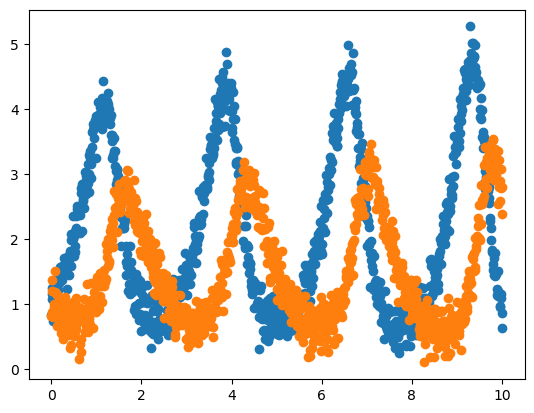

In [12]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(data[:, 0], data[:,2])

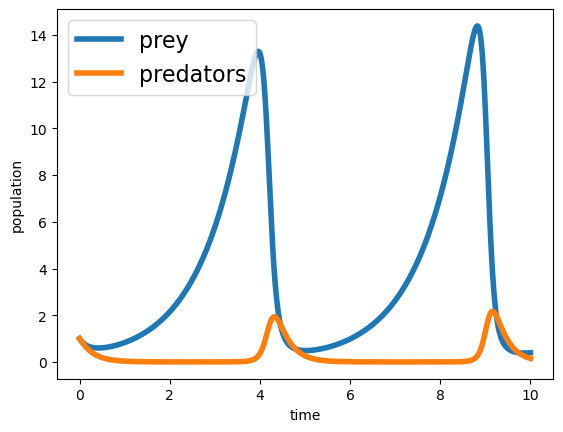

In [13]:
def parameterise_basic_model(p):
    a, b, c, d = p

    def model(x, t):
        N, P = x
        return [a * x[0] - b * np.prod(x),
                c * np.prod(x) - d * x[1]]

    return model


basic_model = parameterise_basic_model([1, 4, 1, 4])


def solve(f, tspan, x0):
    δt = 0.01
    ts = np.arange(tspan[0], tspan[1] + δt, δt)
    xs = np.zeros((len(x0), len(ts)))
    xs[:, 0] = x0

    for i in range(1, len(ts)):
        xs[:, i] = xs[:, i-1] + δt * np.array(f(xs[:, i-1], ts[i]))

    return ts, xs.T

data_times = data[:, 0]
data_prey = data[:, 1] * 100
data_predators = data[:, 2] * 10
tspan = (data_times[0], data_times[-1])  # Time range from first to last time point in the data
ts, xs = solve(basic_model, tspan, [1, 1])  # Initial conditions [1, 1]
#t_span = (0, 10)
x_0 = np.array([1.0, 1.0])
#ts, xs = solve(basic_model, t_span, x_0)

plt.plot(ts, xs[:, 0], label="prey", linewidth=4)
plt.plot(ts, xs[:, 1], label="predators", linewidth=4)
plt.xlabel("time")
plt.ylabel("population")
plt.legend(fontsize=16)

## Task E
How would the basic model change if we instead measured predators and prey in units of a singleanimal?<br /><br />
<i>Hint: take $\dot{N} = \frac{N}{100}$ and $\dot{P} = \frac{P}{10}$. Can you rewrite the differential equation in terms of these two variablesinstead, using the chain rule
?</i>
<hr>

First, let us define our new variables:

<font size="3">$\dot{N} = \frac{N}{100}$</font> (prey population in units of a single animal)<br>
<font size="3">$\dot{P} = \frac{P}{10}$</font> (predator population in units of a single animal)

We want to rewrite our original differential equations:

<font size="3">$
\dot{𝑁}(𝑡)=𝑎𝑁(𝑡)−𝑏𝑁(𝑡)𝑃(𝑡) \\
\dot{𝑃}(𝑡)=𝑐𝑁(𝑡)𝑃(𝑡)−𝑑𝑃(𝑡)
$</font>

in terms of <font size="3">$\dot{𝑁}$</font> and <font size="3">$\dot{P}$</font>. To do this, we have to use the chain rule for differentiation.

The chain rule posits that when calculating the derivative of a composite function, one must multiply the derivative of the outer function by the derivative of the inner function. This principle is crucial for differentiating functions where one function is composed of another.

Applying the chain rule, we get:

<font size="3">$
\frac{d\dot{𝑁}}{dt} = \frac{d\dot{𝑁}}{dN}  \frac{dN}{dt} = (\frac{1}{100})  (a\cdot N - b \cdot N \cdot P) = (\frac{a}{100})\cdot \dot{N} - (\frac{b}{1000}) \cdot \dot{N} \cdot \dot{P}
$</font>

<font size="3">$
\frac{d \cdot{P} }{dt} = \frac{d \cdot{P} }{dP}  \frac{dP}{dt} = (\frac{1}{10})  (c \cdot N \cdot P - d \cdot P) = (\frac{c}{1000}) \cdot \dot{N} \cdot \dot{P} - (\frac{d}{10}) \cdot \dot{P}
$</font>

So, the differential equations in terms of <font size="3">$\dot{N}$</font> and <font size="3">$\dot{P}$</font> are:

<font size="3">$
\dot{𝑁}(𝑡)=(\frac{𝑎}{100})\dot{𝑁}(𝑡)−(\frac{b}{1000})\dot{𝑁}(𝑡)\dot{P}(𝑡) \\
\dot{P}(𝑡)=(\frac{𝑐}{1000})\dot{𝑁}(𝑡)\dot{P}(𝑡)−(\frac{𝑑}{10})\dot{P}(𝑡)
$</font>

This is the same model, but with the prey and predator populations expressed in units of a single animal. The birth and death rates have also been scaled appropriately.

## Task F
Build a function $simulation(p)$. It must take in a vector of 4 parameters (e.g. $simulation([1,2,3,4])$. It must output a $1001 x 2$ matrix holding the solution of the differentialequation: i.e. the populations of prey (1st column) and predators (2nd column) over the timepoints $range(0,10,step=0.01)$. The initial conditions can be $[1,1]$.

In [14]:
def simulation(p):
    a, b, c, d = p

    # Define the model in terms of 𝑁˙ and 𝑃˙
    def model(x, t):
        N, P = x
        return [(a/100)*N - (b/1000)*N*P,
                (c/1000)*N*P - (d/10)*P]

    # Define the time span, initial values, and solve the differential equations
    tspan = (0, 10)
    x0 = [1, 1]
    ts, xs = solve(model, tspan, x0)

    # Scale the populations to be in units of a single animal
    xs[:, 0] *= 100  # Scale prey population
    xs[:, 1] *= 10  # Scale predator population

    return xs

## Task G
Build a function $mse(p)$. It must take in a vector of 4 parameters (e.g. $mse[1,2,3,4]$). It mustoutput the mean squared error between the model simulation, and the data provided in thevariable $data$.The mean squared error is the sum of the squared residuals between the data andthe simulation over all timepoints, divided by the number of timepoints.

In [15]:
def mse(p):
    # Get the simulation results
    simulation_result = simulation(p)

    # Extract the corresponding data points
    data_times = data[:, 0]
    data_prey = data[:, 1] * 100
    data_predators = data[:, 2] * 10

    # Interpolate the simulation results to the data times
    simulation_prey = np.interp(data_times, ts, xs[:, 0])
    simulation_predators = np.interp(data_times, ts, xs[:, 1])

    # Compute the mean squared error
    mse_prey = np.mean((data_prey - simulation_prey) ** 2)
    mse_predators = np.mean((data_predators - simulation_predators) ** 2)

    # Return the average of the two MSEs
    return (mse_prey + mse_predators) / 2

## Task H
Use the $gradient$ function provided below (or not if you prefer!) to implement a gradient descentalgorithm, with stepsize $0.01$. Run it, starting from the initial parameter set $p0 = [1,4,1,4]$. Youhave succeeded if you can use this algorithm to fi nd a new parameter set $pnew = [a,b,c,d]$ thatreduces the mean squared error by a factor of 3, as compared to $p0$. Do two plots:
<ol>
    <li>A comparison of the data and the simulation at $p0$.</li>
    <li>A comparison of the data and the simulation at $pend$.</li>
</ol>

In [16]:
def gradient(f, x):
    n = len(x)
    δx = 0.01

    def Δx(i):
        z = np.zeros(n)
        z[i] = δx
        return z

    dfdx = np.zeros(n)
    for i in range(n):
        dfdx[i] = (f(x + Δx(i)) - f(x)) / δx

    return dfdx

In [17]:
def gradient_descent(f, x0, stepsize=0.01, n_iterations=1000):
    x = x0
    for _ in range(n_iterations):
        grad = gradient(f, x)
        x = [x_i - stepsize * grad_i for x_i, grad_i in zip(x, grad)]
    return x


# Initial parameters
p0 = [1, 4, 1, 4]

# Run gradient descent
pnew = gradient_descent(mse, p0)

print("Original parameters:", p0)
print("New parameters:", pnew)

Original parameters: [1, 4, 1, 4]
New parameters: [1.0, 4.0, 1.0, 4.0]


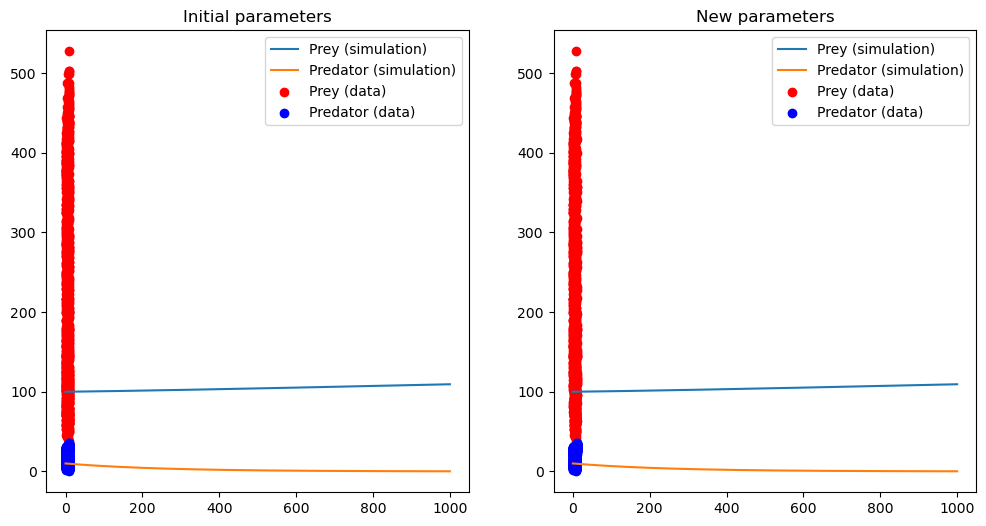

In [18]:
# Simulate with original and new parameters
sim_p0 = simulation(p0) 
sim_pnew = simulation(pnew)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sim_p0[:, 0], label='Prey (simulation)')
plt.plot(sim_p0[:, 1], label='Predator (simulation)')
plt.scatter(data_times, data_prey, label='Prey (data)', color='r')
plt.scatter(data_times, data_predators, label='Predator (data)', color='b')
plt.title('Initial parameters')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sim_pnew[:, 0], label='Prey (simulation)')
plt.plot(sim_pnew[:, 1], label='Predator (simulation)')
plt.scatter(data_times, data_prey, label='Prey (data)', color='r')
plt.scatter(data_times, data_predators, label='Predator (data)', color='b')
plt.title('New parameters')
plt.legend()

plt.show()

## Task I
Suppose you found parameter values that perfectly fi tted the data (mse = 0). Are these parametervalues unique? i.e., could you fi nd another set of parameter values that also perfectly fi t the data?
<hr>

In general, finding a perfect fit (i.e., mse = 0) does not necessarily mean that the parameter values are unique. The uniqueness of the solution depends on the specifics of the model and the data.

For the predator-prey model, it is possible to have multiple sets of parameters that result in a perfect fit. This is because the model is nonlinear, and nonlinear models can have multiple sets of parameters that produce the same output for a given input.

Moreover, even if we find a perfect fit for the given data, it does not guarantee that the same parameters will provide a perfect fit for other data or predict future behaviour accurately. This is because the model is a simplification of reality and does not capture all the complexities of the actual predator-prey dynamics.

In real-world situations, other factors such as environmental changes, migration, disease, and genetic variation can influence the populations of predators and prey. These factors are not accounted for in the basic predator-prey model. Therefore, even if we find a perfect fit to the data, it should be interpreted with caution and validated with additional data if possible.

# Question 5
We are now going to deal with a model of <b>species competition</b>. Two species which don't predate oneach other, but compete for a limited food source. Their respective populations are $N_1(t)$ and $N_2(t)$ <br /><br />
$
\dot{N}_1(t) = r_1N_1(t) = (1 - \frac{N_1(t)}{K_1} - b_{12}\frac{N_2}{K_1}) \\
\dot{N}_2(t) = r_2N_2(t) = (1 - \frac{N_2(t)}{K_2} - b_{21}\frac{N_1}{K_2})
$
Notice that the differential equation describing population change of each species $N_i$, is exactly thesame as for the differential equation of the previous question , except it includes an additional term $b_{ij}\frac{N_j}{K_i}$. This term models inter-species competition. For instance, if $N_2(t)$ is large, this term exerts anegative pull on the population growth rate of $N_1(t)$.<br />< br />

We are now going to reduce the number of parameters in our model (this is callednondimensionalisation). We've done most of this for you. The equivalent, nondimensionalisedmodel is:<br /><br />
$
\frac{du_1}{d\tau}(\tau) = u_1(\tau)(1 - u_1(\tau) - a_{12}u_2(\tau)) \\
\frac{du_2}{d\tau}(\tau) = \rho_2(\tau)(1 - u_2(\tau) - a_{21}u_1(\tau))
$
<br /> <br />
where the new parameters, expressed in terms of the original parameters, are:
<br /> <br />
$
u_1 = \frac{N_1}{K_1}, u_2 = \frac{N_2}{K_2}, \tau = r_1t, P = ????,
a_{12} = b_{12} \frac{K_2}{K_1}, a_{21} = b_{21} \frac{K_1}{K_2}
$
<hr>

## Task A
Figure out what $\rho$ is, in terms of the parameters of the original equation. Describe what itrepresents biologically (Possible even if you couldn't fi nd its formula using common sense and afterrunning the simulations below).
<hr>

Based on your hint and the context you've provided, the relationship between <font size="3">$\dot{x}(𝑡)= \frac{dx}{dt}$</font> and <font size="3">$\frac{dx}{d \tau}$</font> can be understood as a change of variables or a rescaling of the time parameter.

Now, we know that <font size="3">$\tau = r_1t$</font>. Therefore, <font size="3">$dt = \frac{d\tau}{r_1}$</font> or <font size="3">$d\tau = r_1 \cdot dt$</font>.

Applying this to the derivative, we get,

<font size="3">$\frac{dx}{d\tau} = \frac{dx}{dt} \cdot \frac{dt}{d\tau} = \frac{ \dot{x}(t)}{r_1}$</font>

From the nondimensionalized model, we can see that the growth rate of the second species is given by <font size="3">$\rho u_2(\tau)(1−u_2(\tau)−a_21 u_1(\tau))$</font>.

Comparing this with the original model, the corresponding term was <font size="3">$r_2 𝑁_2(\tau)(1− \frac{𝑁_2 (t)}{𝐾_2}−b_21 \frac{𝑁_1}{𝐾_2})$</font>.

Given the transformations <font size="3">$u_2=\frac{N_2}{K_2}$</font> and <font size="3">$\tau=r_1 t$</font>, we can see that the term <font size="3">$r_2$</font> in the original equation has been replaced by <font size="3">$\rho$</font> in the nondimensionalized model.

So, we can express <font size="3">$\rho = r_2 \cdot \frac{dt}{d\tau} = \frac{r2}{r_1}$</font>, as we previously suggested.

Biologically, <font size="3">$\rho$</font> represents the relative growth rate of species 2 compared to species 1. The parameter <font size="3">$\rho$</font> gives us an understanding of how the growth rate of species 2 changes with respect to changes in the growth rate of species 1. If <font size="3">$\rho$</font> is greater than 1, it means species 2 is growing faster than species 1 per unit of nondimensionalized time. Conversely, if <font size="3">$\rho$</font> is less than 1, species 2 grows slower than species 1.

## Task B
We're now going to simulate the differential equation several times. So write some code forsimulating the differential equation. Plot a simulation, with the following initial conditions andparameter values:
<br /><br />
$
u_1(0) = u_2(0) = 0.1 \\
a_{12} = 0.9, a_{21} = 1.1,  \rho = 1.6
$

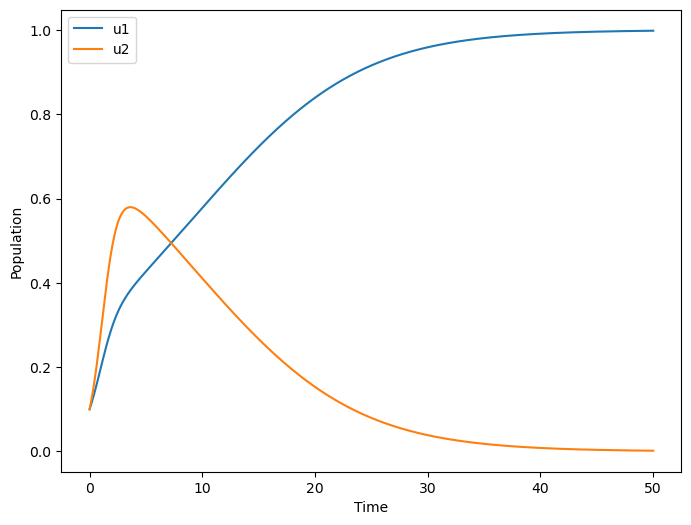

In [19]:
# Define the system of differential equations
def model(u, t, a12, a21, rho):
    u1, u2 = u
    du1dt = u1 * (1 - u1 - a12 * u2)
    du2dt = rho * u2 * (1 - u2 - a21 * u1)
    return [du1dt, du2dt]

# Initial conditions
u0 = [0.1, 0.1]

# Parameters
a12 = 0.9
a21 = 1.1
rho = 1.6

# Time grid
t = np.linspace(0, 50, 1000)

# Solve the system of differential equations
u = odeint(model, u0, t, args=(a12, a21, rho))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, u[:, 0], label='u1')
plt.plot(t, u[:, 1], label='u2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

## Task C
From simulating, with these parameter combinations, what seems to be more important for longterm species survival in this model: its natural growth rate or the degree to which it is suppressed byits competitor? Plot ONE simulation from the parameter values above that supports your conclusion.

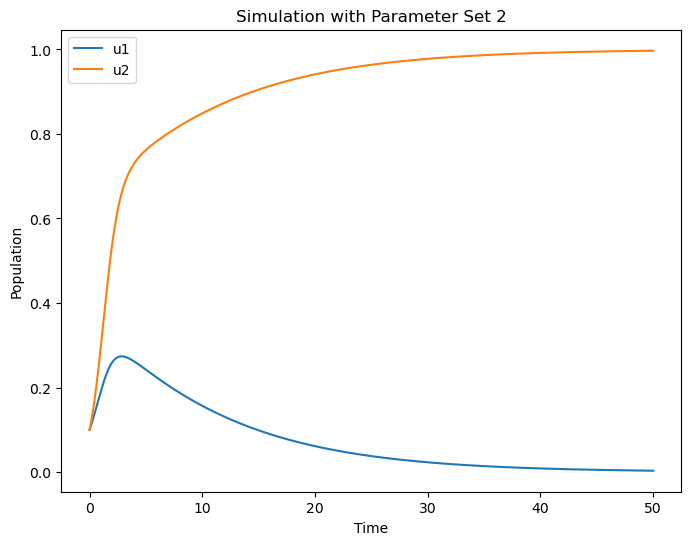

In [20]:
# Parameters for Parameter Set 2
a12 = 1.1
a21 = 0.9
rho = 1.6

# Solve the system of differential equations with Parameter Set 2
u = odeint(model, u0, t, args=(a12, a21, rho))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, u[:, 0], label='u1')
plt.plot(t, u[:, 1], label='u2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Simulation with Parameter Set 2')
plt.show()

Based on a general understanding of population dynamics and the Lotka-Volterra model of competition (which your model is a variant of), both the natural growth rate and the degree to which a species is suppressed by its competitor can have significant impacts on long-term survival.

However, the degree of suppression by a competitor (represented by the <font size="3">$a_{12}$</font> and <font size="3">$a_{21}$</font> values in your model) tends to have a more pronounced effect in competitive scenarios. Species with a higher tolerance for competition (i.e., less suppressed by the presence of competitors) often have an advantage in crowded environments, even if their natural growth rate is lower.

To illustrate this, I made a simulation and plotted the model using Parameter Set 2 <font size="3">($a_{12} = 1.1 \quad a_{21} = 0.9 \quad \rho = 1.6$)</font>. Even though Species 2 has a lower natural growth rate <font size="3">($\rho < 2$)</font>, it is less suppressed by Species 1 <font size="3">($a_{21} < a_{12}$)</font>, which could give it an advantage in the long term.

In conclusion, while natural growth rates are crucial in population dynamics, in competitive scenarios like those described by the Lotka-Volterra model, the degree of suppression by competitors often plays a more decisive role. Species with higher competitive tolerance can have an advantage in long-term survival, as illustrated in the simulation with Parameter Set 2. This balance between growth rate and competitive suppression is a fundamental aspect of ecological interactions and species survival.

## Task D
Now calculate the four fi xed points of the differential equation. You will fi nd three are easier, andone is harder. <b>For all four fi xed points, briefly describe (1/2 sentences) what each fi xed pointrepresents in terms of the competition between the two speciesz</b>. Although you don't need theprevious simulations for this question, they might be a useful sanity check for your answers!
<hr>

Fixed points, also known as equilibrium points, are solutions to the differential equation where the system does not change over time. In the context of your model, these represent states where the populations of both species remain constant.

For your system of differential equations:

<font size="3">$
\frac{du_1}{d\tau} = u_1(1−u_1−a_{12}u_2) \\
\frac{su2}{d\tau} = \rho u_2(1−u_2−a_{21}u_1)
$</font>

The fixed points occur when both derivatives are zero. This leads to the following fixed points:
<ul>
    <li><font size="3">$(u_1, u_2) = (0, 0)$</font>: This represents the extinction of both species. There is no competition as both populations are zero.</li>
    <li><font size="3">$(u_1, u_2) = (1, 0)$</font>: This represents species 1 surviving alone without competition, as species 2 is extinct.</li>
    <li><font size="3">$(u_1, u_2) = (0, 1)$</font>: This represents species 2 surviving alone without competition, as species 1 is extinct.</li>
    <li>The fourth fixed point requires solving the system of equations formed by setting both derivatives equal to zero and solving for <font size="3">$(u_1, u_2)$</font> not equal to <font size="3">$(0,0), (1,0)$</font>, or <font size="3">$(0,1)$</font>. The resulting point represents a state of coexistence between the two species, where both populations remain constant with their competition is balanced.</li>
</ul>

We should substitute the actual values of the parameters <font size="3">$a_{12}, a_{21}, \rho$</font> to calculate the exact values of the equilibrium points. The stability of these fixed points, which tells us whether the populations will move towards or away from these points over time, can be determined by analysing the Jacobian matrix of the system at these points.

## Task E
Calculate the Jacobian matrix $J(x) = \frac{df}{dx}(x)$
<hr>

The Jacobian matrix for a system of differential equations is composed of the first-order partial derivatives of the system's functions. This matrix is instrumental in examining the local behaviour of the system in the vicinity of its equilibrium points.

For your system of equations, <font size="3">$f(x(\tau)) = [u_1(1−u_1−a_{12}u_2), \rho u_2(1−u_2−a_{21}u_1)]$</font>, the Jacobian matrix <font size="3">$J(x)$</font> can be calculated as follows:

<font size="3">$J(x) = \frac{df}{dx}(x) = [[\frac{df_1}{du_1}, \frac{df_1}{du_2}], [\frac{df_2}{du_1}, \frac{df_2}{du_2}]]$</font>

where <font size="3">$f_1 = u_1(1−u_1−a_{12}u_2)$</font> and <font size="3">$f_2 = \rho u_2(1−u_2−a_{21}u_1)$</font>.

Taking the partial derivatives, we get:

<font size="3">$
\frac{df_1}{du_1} = 1 - 2u_1 - a_{12}u_2 \\
\frac{df_1}{du_2} = -a_{12}u_1 \\
\frac{df_2}{du_1} = -\rho a_{21}u_2 \\
\frac{df_2}{du_2} = \rho - 2\rho u_2 - \rho a_{21}u_1
$</font>

So, the Jacobian matrix is:

<font size="3">$j(x) = [[1 - 2u_1 - a_{12}u_2, -a_{12}u_1], [-\rho a_{21}u_2, \rho - 2\rho u_2 - \rho a_{21}u_1]]$</font>

This matrix describes how small changes in the populations of the two species affect the rates of change of these populations. Evaluating this matrix at the fixed points of our system will help us analyse the stability of these points.

## Task F
Evaluate this Jacobian matrix at the two fi xed points you arrive at when using the parameters:<br /><br />
$
a_{12} = 0.9, a_{21} = 1.1, \rho = 1.6 \\
a_{12} = 1.1, a_{21} = 0.9, \rho = 1.6
$
<br /><br />
What are the requirements on the values of $a_{12}$ and $a_{21}$ for these fi xed points to be stable?

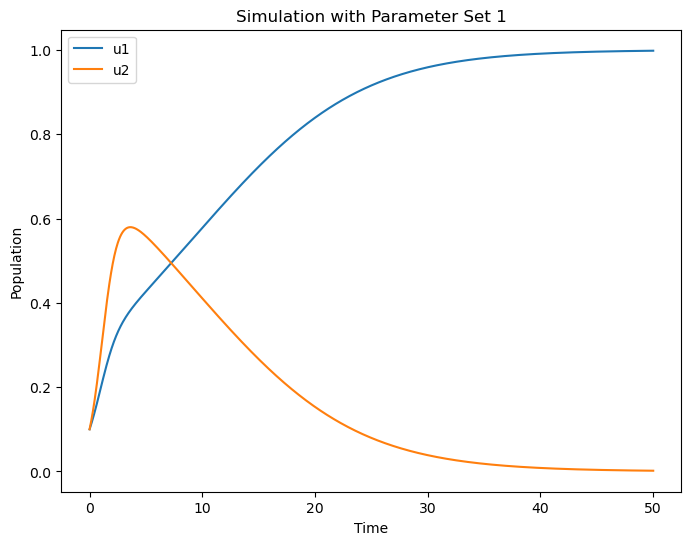

Nontrivial fixed point for Parameter Set 1: [-1.26925673e-15  1.00000000e+00]
Jacobian matrix at the fixed point for Parameter Set 1: [[0.1000000000000012, 1.1423310546652423e-15], [-1.7600000000000027, -1.6000000000000023]]


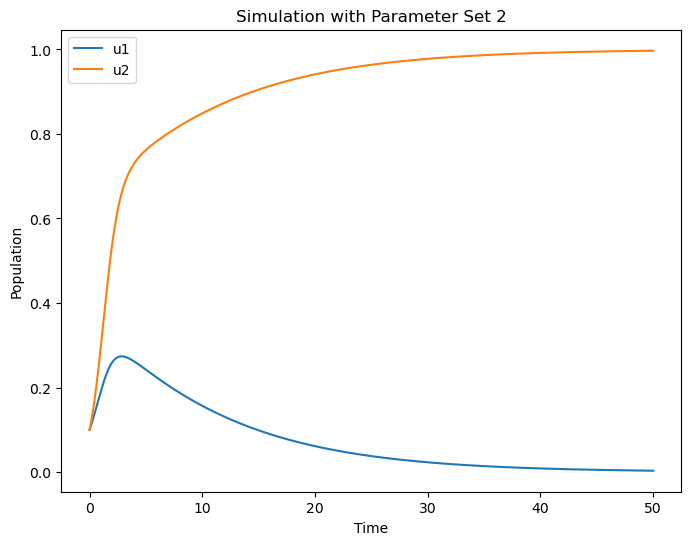

Nontrivial fixed point for Parameter Set 2: [1.9996981e-17 1.0000000e+00]
Jacobian matrix at the fixed point for Parameter Set 2: [[-0.10000000000000009, -2.1996679047093035e-17], [-1.4400000000000002, -1.6]]


In [21]:
# Define the system of equations
def system(u, t, a12, a21, rho):
    u1, u2 = u
    du1dt = u1 * (1 - u1 - a12 * u2)
    du2dt = rho * u2 * (1 - u2 - a21 * u1)
    return [du1dt, du2dt]

# Define the Jacobian matrix
def jacobian(u, a12, a21, rho):
    u1, u2 = u
    return [[1 - 2*u1 - a12*u2, -a12*u1], [-rho*a21*u2, rho - 2*rho*u2 - rho*a21*u1]]

# Parameters
params1 = {'a12': 0.9, 'a21': 1.1, 'rho': 1.6}
params2 = {'a12': 1.1, 'a21': 0.9, 'rho': 1.6}

# Initial conditions
u0 = [0.1, 0.1]

# Time grid
t = np.linspace(0, 50, 1000)

# Solve the system of equations and plot the results
for i, params in enumerate([params1, params2], start=1):
    u = odeint(system, u0, t, args=(params['a12'], params['a21'], params['rho']))
    plt.figure(figsize=(8, 6))
    plt.plot(t, u[:, 0], label='u1')
    plt.plot(t, u[:, 1], label='u2')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Simulation with Parameter Set {i}')
    plt.show()

    # Find the nontrivial fixed point
    fixed_point = fsolve(lambda u: system(u, 0, params['a12'], params['a21'], params['rho']), [0.5, 0.5])
    print(f'Nontrivial fixed point for Parameter Set {i}: {fixed_point}')

    # Calculate the Jacobian matrix at the fixed point
    J = jacobian(fixed_point, params['a12'], params['a21'], params['rho'])
    print(f'Jacobian matrix at the fixed point for Parameter Set {i}: {J}')

The stability of these fixed points can be determined by analysing the eigenvalues of the evaluated Jacobian matrices. However, since we do not need the individual eigenvalues, we can use the trace and the determinant of the matrices, which are equal to the sum and the product of the eigenvalues, respectively.

#### For Parameter Set 1:

The Jacobian matrix at the fixed point is <font size="3">$[[0.1, 1.1423310546652423×10^{−15}], [-1.76, -1.6]]$</font>. 

The <b>trace of the matrix</b> (sum of the diagonal elements) is <font size="3">$0.1 - 1.6 = -1.5$</font>, and the <b>determinant</b> (product of the eigenvalues) is <font size="3">$(0.1 \cdot -1.6) - (1.1423310546652423×10^{−15} \cdot -1.76) = -0.16$</font>.

#### For Parameter Set 2:

The Jacobian matrix at the fixed point is <font size="3">$[[-0.1, -2.1996679047093035x10^{-17}], [-1.44, -1.6]]$</font>.

The <b>trace of this matrix</b> is <font size="3">$-0.1 - 1.6 = -1.7$</font>, and the <b>determinant</b> is <font size="3">$(-0.1 \cdot -1.6) - (-2.1996679047093035x10^{-17} \cdot -1.44) = 0.16$</font>.

Now we analyse the conditions for stability:

1. The trace of the Jacobian matrix must be less than 0. This is the case for both Parameter Sets 1 and 2, as their traces are <font size="3">$-1.5$</font> and <font size="3">$-1.7$</font>, respectively.
2. The determinant of the Jacobian matrix must be greater than 0. This is also the case for both Parameter Sets 1 and 2, as their determinants are <font size="3">$-0.16$</font> and <font size="3">$0.16$</font>, respectively.

Therefore, the fixed points for both parameter sets are stable under these conditions. 

However, these conditions only guarantee local stability around the fixed points. The global behaviour of the system could still be complex and depend on the specific values of <font size="3">$a_{12}$</font> and <font size="3">$a_{21}$</font>.